In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2
import preprocessing
import models

In [2]:
# Suppress all warnings globally (adjust based on specific warnings you want to ignore)
# Suppress convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Suppress user warnings (such as inappropriate l1_ratio usage)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
ArmZ_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Ichor and Chromosome Arm Models/arm_z_wide.csv'
Ratio_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Ichor and Chromosome Arm Models/ratios_wide.csv'
EndMotif_file = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/EndMotif_frequency_withRest5.txt'


ArmZ = pd.read_csv(ArmZ_file).set_index("library")
Ratio = pd.read_csv(Ratio_file).set_index("library")

ArmZ.index.name = None
Ratio.index.name = None


EndMotif = pd.read_csv(EndMotif_file, sep='\t', index_col=0)




display(Ratio.head())
display(ArmZ.head())
display(EndMotif.head())

,cohort,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,...,chr9_15000000_20000000,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000
58,Healthy,-0.021039,-0.019367,-0.030353,-0.020654,-0.020983,-0.011688,-0.010893,-0.020116,-0.014497,...,0.007122,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228
73,Healthy,0.051770,0.024914,0.036842,0.059739,0.026992,0.059263,0.024624,0.042534,0.010221,...,-0.012613,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791
74,Healthy,0.035062,0.033907,0.021390,0.031846,0.014885,0.024985,0.018009,0.017431,-0.009482,...,0.004668,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628
81,Healthy,0.028886,0.018559,0.021573,0.024240,0.020358,0.019593,0.003843,0.012119,-0.009127,...,-0.009311,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814
83,Healthy,-0.033048,-0.037325,-0.048439,-0.041196,-0.034455,-0.029842,-0.020518,-0.021768,-0.022954,...,0.006940,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386


,cohort,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
58,Healthy,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,...,-0.263070,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390
73,Healthy,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,...,1.484744,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831
74,Healthy,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,...,-0.125466,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078
81,Healthy,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,...,1.979131,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279
83,Healthy,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,...,0.986982,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326


,WBC1116_UC1_motifs.txt,WBC1207_UC1_motifs.txt,WBC1135_UC1_motifs.txt,WBC1198_UC1_motifs.txt,WBC1202_UC1_motifs.txt,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,...,WBC1222_UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [4]:
CNA = ArmZ.drop('cohort', axis=1).T
Ratio = Ratio.drop('cohort', axis=1).T

display(CNA.head())
display(Ratio.head())

,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_p,0.500638,-1.083426,-0.420803,-1.398996,-0.033880,0.780274,-2.180396,0.782572,1.027945,-1.133924,...,-0.728816,-0.337504,-3.506652,0.054370,-1.077602,0.375962,0.087941,-0.230680,-1.347024,-0.328951
chr1_q,0.481548,-1.220784,0.051099,1.308646,0.633287,3.417682,2.903743,0.686933,1.285963,-0.471709,...,-0.061192,-0.091333,6.863572,0.483224,-0.971273,1.363424,0.331620,-0.063272,-1.794822,-0.067849
chr10_p,-0.410989,0.459364,1.188064,-0.794303,-0.678556,-2.533819,5.774827,1.743248,2.061444,0.508120,...,1.188277,0.703937,6.090007,-1.577790,1.628864,1.201583,0.888284,0.365613,-0.845244,0.913896
chr10_q,0.848811,0.366229,-0.764085,0.732416,0.435361,-0.787439,-1.173610,3.542784,-0.540900,-1.093383,...,-2.131089,-0.912207,-22.919694,0.195062,0.229661,-2.714400,-0.950577,-0.332129,-3.283414,0.754528
chr11_p,-0.218577,1.666293,-0.576497,3.011589,0.383254,-2.370622,4.136560,-0.821380,-1.203769,-0.114111,...,-0.400553,-0.063994,-16.543998,0.057660,-9.572329,-2.285091,-0.431836,0.001281,-1.473132,-0.096034


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_5000000_10000000,-0.021039,0.051770,0.035062,0.028886,-0.033048,0.001773,0.021462,0.012149,1.277114e-02,0.034097,...,0.018560,-0.011622,-0.017025,0.003578,0.073420,0.030748,0.000096,0.045943,-0.048431,0.019924
chr1_10000000_15000000,-0.019367,0.024914,0.033907,0.018559,-0.037325,0.005899,0.015108,0.011341,1.282568e-02,0.033062,...,0.014002,-0.003107,-0.011186,0.004146,0.069920,0.022014,-0.009324,0.039728,-0.045393,0.014763
chr1_15000000_20000000,-0.030353,0.036842,0.021390,0.021573,-0.048439,0.001090,0.008654,-0.002082,-5.997953e-03,0.006861,...,-0.006208,-0.013992,-0.021590,0.000763,0.055114,0.016451,-0.012564,0.024183,-0.079331,0.006242
chr1_20000000_25000000,-0.020654,0.059739,0.031846,0.024240,-0.041196,0.004013,0.012817,0.010174,6.564354e-03,0.037555,...,0.018111,-0.005459,-0.008415,0.002161,0.073577,0.025016,-0.004567,0.031184,-0.048032,0.015166
chr1_25000000_30000000,-0.020983,0.026992,0.014885,0.020358,-0.034455,0.009259,0.015607,0.011452,-9.562842e-07,0.028230,...,0.006256,-0.014720,-0.005249,0.009170,0.026160,0.028319,-0.014588,0.049296,-0.058022,0.018853


In [5]:
EndMotif.columns = EndMotif.columns.str.replace('_sorted_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('.dup_mk_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('_motifs.txt', '')
display(EndMotif.head())

,WBC1116_UC1,WBC1207_UC1,WBC1135_UC1,WBC1198_UC1,WBC1202_UC1,PB-278_UC1,PB046_UC1,NU90,RCC013_UC1,NU71,...,WBC1222_UC1,BC020_UC1,WBC1196_UC1,WBC1111_UC1,WBC1188_UC1,BC016_UC1,WBC1309_UC1,WBC1304_UC1,WBC1322_UC1,BC011_UC1
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [6]:
# Step 1: Find common columns
common_columns = set(EndMotif.columns) & set(CNA.columns) & set(Ratio.columns)
common_columns_list = list(common_columns)  # Convert to list

# Step 2: Find non-common columns
non_common_endmotif = set(EndMotif.columns) - common_columns
non_common_cna = set(CNA.columns) - common_columns
non_common_ratio = set(Ratio.columns) - common_columns

# Print non-common columns
print("Non-common columns in EndMotif:", non_common_endmotif)
print("Non-common columns in CNA:", non_common_cna)
print("Non-common columns in Ratio:", non_common_ratio)

# Step 3: Filter DataFrames to keep only common columns
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

Non-common columns in EndMotif: {'WBC1291_UC1'}
Non-common columns in CNA: {'NU32_UC1', 'NU19R_UC1'}
Non-common columns in Ratio: {'NU32_UC1', 'NU19R_UC1'}
(38, 204)


,WBC1269_UC1,PB206_UC1,WBC1104_UC1,PB242_UC1,NU55,PB-397_UC1,NU2,WBC1105_UC1,NU97,WBC1313_UC1,...,WBC1303_UC1,PB-196_UC1,WBC1310_UC1,PB-377_UC1,WBC1277_UC1,NU10,NU74,PB-276_UC1,WBC1116_UC1,RCC003_UC1
chr1_p,1.055335,-0.592002,0.745585,0.660225,-0.411177,-0.526294,0.549136,-0.590078,1.263120,-3.506652,...,0.192540,0.570075,0.254130,0.732173,-0.104540,0.403605,-0.386891,-0.227455,0.225376,-0.515447
chr1_q,1.574136,0.348688,0.899457,-1.450359,-3.160474,-0.121863,0.436635,0.377707,0.975162,6.863572,...,-0.228412,1.173906,0.949389,1.575447,-0.246783,0.451589,0.044474,-0.612089,0.604039,-0.513805
chr10_p,2.190164,0.878343,-0.089041,-0.718137,-0.362445,-0.054247,0.737678,2.269780,0.241824,6.090007,...,-0.052824,-0.249083,-4.740119,1.770766,1.877942,0.162212,0.761665,3.464421,-1.020212,2.001151
chr10_q,0.812391,0.589322,-0.097208,1.484122,0.213260,-1.035231,-0.065388,-3.303028,0.050908,-22.919694,...,1.670150,1.897891,-10.868530,1.908085,4.172275,-0.481788,-0.976638,8.532234,-0.206038,5.706776
chr11_p,1.544363,-0.051112,-0.499122,0.211065,1.354945,-0.601813,-0.894143,-1.665440,-1.156618,-16.543998,...,0.246432,0.706598,0.031833,-1.574290,-0.606585,-0.278365,-0.418571,-0.910559,-1.130475,-0.832142


(312, 204)


,WBC1269_UC1,PB206_UC1,WBC1104_UC1,PB242_UC1,NU55,PB-397_UC1,NU2,WBC1105_UC1,NU97,WBC1313_UC1,...,WBC1303_UC1,PB-196_UC1,WBC1310_UC1,PB-377_UC1,WBC1277_UC1,NU10,NU74,PB-276_UC1,WBC1116_UC1,RCC003_UC1
chr1_5000000_10000000,-0.063519,0.017456,-0.004462,-0.003297,0.016921,0.018638,0.060445,0.017220,0.064435,-0.017025,...,-0.024505,0.009696,0.028533,0.044674,-0.011558,0.026539,-0.039911,-0.007965,0.001690,-0.002863
chr1_10000000_15000000,-0.057810,0.013441,-0.017276,-0.014764,0.003689,-0.000851,0.051483,0.014321,0.070660,-0.011186,...,-0.022664,0.005330,0.023055,0.023791,-0.008822,0.024987,-0.043116,-0.004865,0.000958,0.002121
chr1_15000000_20000000,-0.095043,0.004086,-0.021416,-0.018648,0.009013,-0.003209,0.039643,0.013584,0.078783,-0.021590,...,-0.039664,0.007691,0.014475,0.005747,-0.021008,0.004966,-0.062128,-0.016334,-0.001531,-0.008602
chr1_20000000_25000000,-0.056963,0.001670,-0.004270,0.001088,0.023968,0.004245,0.057445,0.016913,0.090739,-0.008415,...,-0.027093,0.006280,0.025398,0.040397,-0.014026,0.019477,-0.056208,-0.006144,-0.000236,-0.004955
chr1_25000000_30000000,-0.061944,0.003306,-0.004069,0.015535,0.067373,-0.003707,0.037269,0.018278,0.143551,-0.005249,...,-0.023840,0.008423,0.024660,0.026598,-0.018222,0.012029,-0.061846,-0.012234,0.003230,-0.009049


(256, 204)


,WBC1269_UC1,PB206_UC1,WBC1104_UC1,PB242_UC1,NU55,PB-397_UC1,NU2,WBC1105_UC1,NU97,WBC1313_UC1,...,WBC1303_UC1,PB-196_UC1,WBC1310_UC1,PB-377_UC1,WBC1277_UC1,NU10,NU74,PB-276_UC1,WBC1116_UC1,RCC003_UC1
AAAA,3844560,1873724,1821260,2387192,2006368,1886394,1874902,1890132,6615373,5442866,...,4155851,2124692,3404578,1944433,4077443,1721828,2225841,1652556,1363822,1835395
AAAC,1144906,597739,577940,785988,621965,577971,547958,613662,1960903,1716645,...,1275373,702314,999934,570855,1274982,504905,622464,544355,442016,598482
AAAG,1448376,789866,744805,1025115,814628,727714,728120,761249,2625731,2350170,...,1703426,918093,1283426,744478,1692946,683926,796999,692573,554817,786859
AAAT,1863572,1064783,942990,1299429,1051853,965855,958561,973352,3387300,3089527,...,2199611,1257349,1679510,928191,2298625,873614,1085831,962189,739560,1048246
AACA,1416519,677695,660068,933265,702537,656493,639756,696976,2205793,1868176,...,1448876,775464,1167888,698640,1459529,583710,727608,626294,488506,681679


In [7]:
# Sort the common columns list alphabetically
common_columns_list = sorted(list(common_columns))

# Reassign the DataFrames using the sorted common columns list
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

(38, 204)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_p,0.500638,-1.083426,-0.420803,-1.398996,-0.033880,0.780274,-2.180396,0.782572,1.027945,-1.133924,...,-0.728816,-0.337504,-3.506652,0.054370,-1.077602,0.375962,0.087941,-0.230680,-1.347024,-0.328951
chr1_q,0.481548,-1.220784,0.051099,1.308646,0.633287,3.417682,2.903743,0.686933,1.285963,-0.471709,...,-0.061192,-0.091333,6.863572,0.483224,-0.971273,1.363424,0.331620,-0.063272,-1.794822,-0.067849
chr10_p,-0.410989,0.459364,1.188064,-0.794303,-0.678556,-2.533819,5.774827,1.743248,2.061444,0.508120,...,1.188277,0.703937,6.090007,-1.577790,1.628864,1.201583,0.888284,0.365613,-0.845244,0.913896
chr10_q,0.848811,0.366229,-0.764085,0.732416,0.435361,-0.787439,-1.173610,3.542784,-0.540900,-1.093383,...,-2.131089,-0.912207,-22.919694,0.195062,0.229661,-2.714400,-0.950577,-0.332129,-3.283414,0.754528
chr11_p,-0.218577,1.666293,-0.576497,3.011589,0.383254,-2.370622,4.136560,-0.821380,-1.203769,-0.114111,...,-0.400553,-0.063994,-16.543998,0.057660,-9.572329,-2.285091,-0.431836,0.001281,-1.473132,-0.096034


(312, 204)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1_5000000_10000000,-0.021039,0.051770,0.035062,0.028886,-0.033048,0.001773,0.021462,0.012149,1.277114e-02,0.034097,...,0.018560,-0.011622,-0.017025,0.003578,0.073420,0.030748,0.000096,0.045943,-0.048431,0.019924
chr1_10000000_15000000,-0.019367,0.024914,0.033907,0.018559,-0.037325,0.005899,0.015108,0.011341,1.282568e-02,0.033062,...,0.014002,-0.003107,-0.011186,0.004146,0.069920,0.022014,-0.009324,0.039728,-0.045393,0.014763
chr1_15000000_20000000,-0.030353,0.036842,0.021390,0.021573,-0.048439,0.001090,0.008654,-0.002082,-5.997953e-03,0.006861,...,-0.006208,-0.013992,-0.021590,0.000763,0.055114,0.016451,-0.012564,0.024183,-0.079331,0.006242
chr1_20000000_25000000,-0.020654,0.059739,0.031846,0.024240,-0.041196,0.004013,0.012817,0.010174,6.564354e-03,0.037555,...,0.018111,-0.005459,-0.008415,0.002161,0.073577,0.025016,-0.004567,0.031184,-0.048032,0.015166
chr1_25000000_30000000,-0.020983,0.026992,0.014885,0.020358,-0.034455,0.009259,0.015607,0.011452,-9.562842e-07,0.028230,...,0.006256,-0.014720,-0.005249,0.009170,0.026160,0.028319,-0.014588,0.049296,-0.058022,0.018853


(256, 204)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
AAAA,1773406,1587091,1887836,1692740,1351234,1947498,1772534,2215453,2194241,4373856,...,6396863,4114169,5442866,3373010,1828537,4126103,1994076,5080512,7808827,2200138
AAAC,560709,501785,517189,515721,594904,659277,549197,656513,599598,1203850,...,1733476,1228579,1716645,1083556,505765,1241514,614127,1593973,2241726,698165
AAAG,736759,646249,692175,676333,723339,901326,734643,889613,787765,1533031,...,2209077,1541324,2350170,1455933,709674,1592712,782947,2130402,2918270,972379
AAAT,986962,828327,885726,885751,1042110,1137365,912342,1125191,1050821,2079990,...,2942472,2032709,3089527,1818640,888758,2121078,1026192,2802885,3622751,1220497
AACA,628611,613356,590285,618050,629813,721027,615778,741675,667928,1472676,...,2110289,1435625,1868176,1187004,606221,1417487,708828,1959415,2690625,750111


In [8]:
CNA_t  = preprocessing.preprocess_dataframe(CNA)
display(CNA_t.head(n=10))

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,0.490795,...,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390,Healthy
73,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,-0.817676,...,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831,Healthy
74,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,-0.075865,...,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078,Healthy
81,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,-2.382215,...,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279,Healthy
83,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,0.373611,...,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326,Healthy
BC001_UC1,0.780274,3.417682,-2.533819,-0.787439,-2.370622,-0.370196,-0.915507,-2.252788,-1.336973,-4.150150,...,-3.486175,0.964173,0.660384,2.998208,-0.079134,-8.389713,1.395236,-1.755736,-0.922045,Bladder
BC002_UC1,-2.180396,2.903743,5.774827,-1.173610,4.136560,6.649448,0.765838,-2.829714,-1.759648,6.439683,...,-11.117937,5.992367,-4.534973,6.192796,-0.791413,-3.553568,7.955956,16.448979,-3.456060,Bladder
BC003_UC1,0.782572,0.686933,1.743248,3.542784,-0.821380,-0.078678,0.217801,0.153071,-1.186522,-0.183563,...,-0.519318,0.326576,-1.109231,2.184878,2.180289,-0.901500,-1.470931,-0.635268,0.410366,Bladder
BC004_UC1,1.027945,1.285963,2.061444,-0.540900,-1.203769,-1.553622,0.705947,-0.161783,-0.856667,-1.637528,...,-0.530283,1.155041,-1.733448,0.201368,0.624967,-2.835070,-1.283966,-0.420060,-0.878452,Bladder
BC005_UC1,-1.133924,-0.471709,0.508120,-1.093383,-0.114111,-0.829673,0.980981,0.389461,0.607093,-0.473091,...,2.055705,0.881307,1.296733,1.126900,-0.292244,0.646627,1.842631,0.789933,-1.592165,Bladder


In [9]:
Ratio_t = preprocessing.preprocess_dataframe(Ratio)
display(Ratio_t.head(n=10))

,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000,target
58,-0.021039,-0.019367,-0.030353,-0.020654,-2.098302e-02,-0.011688,-0.010893,-0.020116,-0.014497,-0.018139,...,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228,Healthy
73,0.051770,0.024914,0.036842,0.059739,2.699196e-02,0.059263,0.024624,0.042534,0.010221,0.001072,...,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791,Healthy
74,0.035062,0.033907,0.021390,0.031846,1.488474e-02,0.024985,0.018009,0.017431,-0.009482,0.005712,...,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628,Healthy
81,0.028886,0.018559,0.021573,0.024240,2.035761e-02,0.019593,0.003843,0.012119,-0.009127,-0.012554,...,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814,Healthy
83,-0.033048,-0.037325,-0.048439,-0.041196,-3.445464e-02,-0.029842,-0.020518,-0.021768,-0.022954,-0.017482,...,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386,Healthy
BC001_UC1,0.001773,0.005899,0.001090,0.004013,9.259055e-03,0.001114,0.003944,0.005430,0.000056,0.004991,...,-0.005370,-0.001673,0.000619,0.002758,-0.004630,0.006037,-0.006101,-0.000322,0.006258,Bladder
BC002_UC1,0.021462,0.015108,0.008654,0.012817,1.560669e-02,0.012384,0.007988,0.005751,-0.003250,0.005263,...,-0.010184,-0.021263,0.000904,0.004138,-0.010135,0.007143,0.000489,0.008998,0.022992,Bladder
BC003_UC1,0.012149,0.011341,-0.002082,0.010174,1.145213e-02,0.013576,0.013175,0.001322,-0.010533,0.000986,...,-0.006689,-0.005413,0.001644,-0.004609,-0.007393,0.008884,0.009904,-0.005574,0.012285,Bladder
BC004_UC1,0.012771,0.012826,-0.005998,0.006564,-9.562842e-07,0.023310,0.013885,-0.000274,-0.006900,-0.000430,...,-0.011044,-0.004128,0.002584,-0.001808,-0.005359,-0.005403,0.007719,0.002094,0.008729,Bladder
BC005_UC1,0.034097,0.033062,0.006861,0.037555,2.822959e-02,0.034255,0.016869,0.017036,-0.006845,0.018240,...,-0.014738,-0.009885,-0.002098,-0.000740,-0.014605,0.004030,0.010796,0.007706,0.023855,Bladder


In [10]:
EndMotif_t = preprocessing.preprocess_dataframe(EndMotif)
display(EndMotif_t.head(n=10))

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,1773406,560709,736759,986962,628611,321587,90911,475110,668171,277184,...,492672,293362,126111,225688,367892,589155,480160,376707,1173413,Healthy
73,1587091,501785,646249,828327,613356,306271,83869,436504,612742,246958,...,455947,264024,108622,201397,348060,509079,423960,325374,1075806,Healthy
74,1887836,517189,692175,885726,590285,298465,88066,423570,664680,254706,...,506800,287325,125198,218660,363725,568509,479018,367728,1337271,Healthy
81,1692740,515721,676333,885751,618050,312410,88345,450700,642054,261437,...,484428,295011,123366,222690,372001,566296,456914,363952,1181875,Healthy
83,1351234,594904,723339,1042110,629813,371051,78817,493783,563214,287541,...,346972,243441,94095,210660,306356,471020,380509,310184,834192,Healthy
BC001_UC1,1947498,659277,901326,1137365,721027,377518,108398,564919,777499,340058,...,573934,343768,148300,261403,425147,692014,583740,445498,1332659,Bladder
BC002_UC1,1772534,549197,734643,912342,615778,315533,89938,451553,668957,280878,...,478633,290004,122769,222283,369658,558754,470002,374161,1208929,Bladder
BC003_UC1,2215453,656513,889613,1125191,741675,380403,107406,548199,814501,327281,...,602520,333955,140717,260656,427519,677354,576728,437252,1544787,Bladder
BC004_UC1,2194241,599598,787765,1050821,667928,343498,104040,496820,739142,289379,...,574220,347869,152872,261557,424017,683217,555755,442021,1588384,Bladder
BC005_UC1,4373856,1203850,1533031,2079990,1472676,680520,185266,1014609,1453279,511460,...,1088041,633755,230600,433284,804106,1319622,1033215,787967,2876733,Bladder


# Data preparation

In [11]:
CNA_t = preprocessing.remove_nan_inf_columns(CNA_t)
Ratio_t = preprocessing.remove_nan_inf_columns(Ratio_t)
EndMotif_t = preprocessing.normalize_features_by_sample(preprocessing.remove_nan_inf_columns(EndMotif_t))

display(CNA_t.head(n=10))
display(Ratio_t.head(n=10))
display(EndMotif_t.head(n=10))

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,0.490795,...,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390,Healthy
73,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,-0.817676,...,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831,Healthy
74,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,-0.075865,...,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078,Healthy
81,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,-2.382215,...,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279,Healthy
83,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,0.373611,...,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326,Healthy
BC001_UC1,0.780274,3.417682,-2.533819,-0.787439,-2.370622,-0.370196,-0.915507,-2.252788,-1.336973,-4.150150,...,-3.486175,0.964173,0.660384,2.998208,-0.079134,-8.389713,1.395236,-1.755736,-0.922045,Bladder
BC002_UC1,-2.180396,2.903743,5.774827,-1.173610,4.136560,6.649448,0.765838,-2.829714,-1.759648,6.439683,...,-11.117937,5.992367,-4.534973,6.192796,-0.791413,-3.553568,7.955956,16.448979,-3.456060,Bladder
BC003_UC1,0.782572,0.686933,1.743248,3.542784,-0.821380,-0.078678,0.217801,0.153071,-1.186522,-0.183563,...,-0.519318,0.326576,-1.109231,2.184878,2.180289,-0.901500,-1.470931,-0.635268,0.410366,Bladder
BC004_UC1,1.027945,1.285963,2.061444,-0.540900,-1.203769,-1.553622,0.705947,-0.161783,-0.856667,-1.637528,...,-0.530283,1.155041,-1.733448,0.201368,0.624967,-2.835070,-1.283966,-0.420060,-0.878452,Bladder
BC005_UC1,-1.133924,-0.471709,0.508120,-1.093383,-0.114111,-0.829673,0.980981,0.389461,0.607093,-0.473091,...,2.055705,0.881307,1.296733,1.126900,-0.292244,0.646627,1.842631,0.789933,-1.592165,Bladder


,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000,target
58,-0.021039,-0.019367,-0.030353,-0.020654,-2.098302e-02,-0.011688,-0.010893,-0.020116,-0.014497,-0.018139,...,0.015006,0.011725,-0.009685,-0.017064,0.015936,-0.017214,0.002501,-0.012768,-0.025228,Healthy
73,0.051770,0.024914,0.036842,0.059739,2.699196e-02,0.059263,0.024624,0.042534,0.010221,0.001072,...,-0.033648,-0.036388,0.038446,-0.007840,-0.057904,0.039415,0.014236,-0.000344,0.032791,Healthy
74,0.035062,0.033907,0.021390,0.031846,1.488474e-02,0.024985,0.018009,0.017431,-0.009482,0.005712,...,-0.021091,-0.019005,-0.005667,0.010702,-0.020067,0.003183,0.008317,0.014109,0.023628,Healthy
81,0.028886,0.018559,0.021573,0.024240,2.035761e-02,0.019593,0.003843,0.012119,-0.009127,-0.012554,...,0.001900,-0.002607,0.014636,-0.013138,-0.011739,0.010163,-0.009431,-0.009023,0.011814,Healthy
83,-0.033048,-0.037325,-0.048439,-0.041196,-3.445464e-02,-0.029842,-0.020518,-0.021768,-0.022954,-0.017482,...,0.017985,0.019683,-0.017984,-0.011737,0.017108,-0.017930,0.009451,-0.019297,-0.045386,Healthy
BC001_UC1,0.001773,0.005899,0.001090,0.004013,9.259055e-03,0.001114,0.003944,0.005430,0.000056,0.004991,...,-0.005370,-0.001673,0.000619,0.002758,-0.004630,0.006037,-0.006101,-0.000322,0.006258,Bladder
BC002_UC1,0.021462,0.015108,0.008654,0.012817,1.560669e-02,0.012384,0.007988,0.005751,-0.003250,0.005263,...,-0.010184,-0.021263,0.000904,0.004138,-0.010135,0.007143,0.000489,0.008998,0.022992,Bladder
BC003_UC1,0.012149,0.011341,-0.002082,0.010174,1.145213e-02,0.013576,0.013175,0.001322,-0.010533,0.000986,...,-0.006689,-0.005413,0.001644,-0.004609,-0.007393,0.008884,0.009904,-0.005574,0.012285,Bladder
BC004_UC1,0.012771,0.012826,-0.005998,0.006564,-9.562842e-07,0.023310,0.013885,-0.000274,-0.006900,-0.000430,...,-0.011044,-0.004128,0.002584,-0.001808,-0.005359,-0.005403,0.007719,0.002094,0.008729,Bladder
BC005_UC1,0.034097,0.033062,0.006861,0.037555,2.822959e-02,0.034255,0.016869,0.017036,-0.006845,0.018240,...,-0.014738,-0.009885,-0.002098,-0.000740,-0.014605,0.004030,0.010796,0.007706,0.023855,Bladder


,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,15089.985883,4771.096350,6269.113169,8398.100969,5348.877311,2736.397244,773.565504,4042.730877,5685.495006,2358.570258,...,4192.166670,2496.229537,1073.083778,1920.388639,3130.408427,5013.144555,4085.701538,3205.415631,9984.620332,Healthy
73,13830.525129,4372.748665,5631.663864,7218.362015,5345.021534,2668.964011,730.866921,3803.864770,5339.670900,2152.087577,...,3973.298595,2300.807305,946.574141,1755.051392,3033.129529,4436.311404,3694.551499,2835.434946,9374.989788,Healthy
74,16582.400609,4542.892067,6079.936574,7780.052590,5184.953748,2621.661097,773.555379,3720.560168,5838.425603,2237.290172,...,4451.637022,2523.809407,1099.715967,1920.668807,3194.892809,4993.677411,4207.605097,3230.054417,11746.339960,Healthy
81,14656.527583,4465.351478,5856.004625,7669.242744,5351.363395,2704.990596,764.931962,3902.369520,5559.201154,2263.642734,...,4194.402179,2554.341989,1068.160014,1928.153247,3220.957098,4903.253272,3956.173213,3151.265124,10233.221603,Healthy
83,12480.529336,5494.767615,6681.043853,9625.338339,5817.200886,3427.173155,727.984850,4560.774238,5202.066296,2655.841909,...,3204.770028,2248.516942,869.098474,1945.738717,2829.624658,4350.526206,3514.530967,2864.981573,7704.925814,Healthy
BC001_UC1,14112.179486,4777.327296,6531.290038,8241.702441,5224.787105,2735.613477,785.485804,4093.579723,5634.000876,2464.166603,...,4158.905232,2491.050423,1074.628173,1894.207878,3080.748104,5014.549835,4229.962574,3228.217814,9656.863833,Bladder
BC002_UC1,14948.187414,4631.504774,6195.413598,7693.990187,5192.997680,2660.962452,758.467866,3808.050436,5641.468433,2368.708857,...,4036.422312,2445.670516,1035.339249,1874.563728,3117.411041,4712.101156,3963.635101,3155.385877,10195.176658,Bladder
BC003_UC1,15733.329387,4662.312979,6317.703131,7990.691125,5267.102066,2701.481683,762.757764,3893.106934,5784.285435,2324.228848,...,4278.874624,2371.625133,999.320189,1851.082693,3036.082122,4810.318067,4095.709361,3105.202295,10970.507026,Bladder
BC004_UC1,17264.891751,4717.801994,6198.351708,8268.148674,5255.441229,2702.736749,818.615338,3909.116419,5815.772570,2276.913571,...,4518.120909,2737.128979,1202.838946,2058.002422,3336.282389,5375.739286,4372.833210,3477.942813,12497.842224,Bladder
BC005_UC1,16446.718222,4526.756649,5764.553950,7821.247301,5537.605080,2558.913847,696.643350,3815.166372,5464.667838,1923.208835,...,4091.287811,2383.066545,867.109759,1629.248850,3023.626019,4962.086359,3885.129270,2962.939616,10817.186723,Bladder


In [12]:
display(CNA_t.describe())
display(Ratio_t.describe())
display(EndMotif_t.describe())

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.162031,1.037177,1.390392,-2.042926,-1.607228,-1.015403,0.590353,1.493541,-0.575638,-0.606133,...,2.039453,-1.835994,1.160989,-0.422550,2.425851,0.921825,-3.123275,2.430222,-0.426437,-1.388056
std,1.999250,4.303198,5.692338,9.097881,4.989211,9.651530,4.062125,5.498441,2.294336,4.933866,...,6.700959,7.195654,4.256603,2.672458,7.448803,5.554968,9.852073,6.902910,4.231227,4.562190
min,-4.682990,-22.207406,-13.579496,-69.523154,-33.755484,-56.298640,-16.734196,-7.249969,-12.121161,-38.948017,...,-3.114697,-46.921611,-2.676041,-14.293649,-9.225742,-12.243166,-58.246859,-9.749766,-15.861782,-26.729690
25%,-0.542732,-0.160129,-0.267678,-1.332253,-0.911917,-1.006611,-0.109897,-0.261313,-0.850354,-0.780845,...,-0.330417,-1.063883,0.024428,-0.777725,-0.057384,-0.447040,-1.747904,-0.329581,-0.571113,-1.145984
50%,-0.150120,0.352978,0.567961,-0.249628,-0.422437,-0.173777,0.366009,0.228788,-0.137277,-0.245273,...,0.161471,-0.005661,0.361082,-0.023346,0.662426,0.270803,-0.452887,0.485278,-0.076218,-0.592887
75%,0.486999,1.102930,1.538325,1.023752,-0.110768,0.655720,0.862268,0.776092,0.216765,0.430454,...,0.881695,0.716842,0.849986,0.608242,1.919324,1.342741,0.493755,1.531499,0.314302,0.274693
max,14.923479,24.835553,42.411109,12.345439,5.993438,50.740617,44.795316,48.825740,9.977101,24.174922,...,43.082086,13.078152,44.631512,14.905641,80.136252,61.667198,31.147789,37.640094,33.112051,8.674836


,chr1_5000000_10000000,chr1_10000000_15000000,chr1_15000000_20000000,chr1_20000000_25000000,chr1_25000000_30000000,chr1_30000000_35000000,chr1_35000000_40000000,chr1_40000000_45000000,chr1_45000000_50000000,chr1_50000000_55000000,...,chr9_15000000_20000000,chr9_20000000_25000000,chr9_25000000_30000000,chr9_90000000_95000000,chr9_95000000_100000000,chr9_100000000_105000000,chr9_110000000_115000000,chr9_115000000_120000000,chr9_120000000_125000000,chr9_125000000_130000000
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.051826,0.045735,0.046086,0.045218,0.047285,0.050408,0.032474,0.030731,-0.001838,0.013330,...,-0.011854,-0.023876,-0.022723,0.004326,0.013344,-0.023392,0.012808,0.007329,0.022273,0.046997
std,0.426327,0.420924,0.551328,0.410136,0.465149,0.447652,0.255546,0.296093,0.061662,0.114027,...,0.121849,0.197817,0.218970,0.074799,0.183197,0.192300,0.111521,0.040774,0.206976,0.384508
min,-0.217251,-0.189567,-0.279060,-0.210258,-0.218705,-0.181453,-0.160301,-0.158480,-0.096279,-0.102085,...,-1.708884,-2.730597,-3.042161,-0.109134,-0.075988,-2.663955,-0.090137,-0.223804,-0.083387,-0.161744
25%,-0.003934,-0.006714,-0.019392,-0.005508,-0.008337,-0.003207,-0.004789,-0.008744,-0.011885,-0.006098,...,-0.007934,-0.017703,-0.013979,-0.008636,-0.007811,-0.014997,-0.004025,-0.002220,-0.005958,-0.008320
50%,0.009779,0.006192,0.001836,0.006751,0.008194,0.009172,0.006499,0.003805,-0.006210,0.001636,...,-0.002125,-0.005469,-0.004000,-0.000910,-0.001041,-0.005181,0.002814,0.002834,0.001102,0.008644
75%,0.029223,0.023132,0.018718,0.027278,0.027093,0.027667,0.020268,0.017556,0.000621,0.010642,...,0.002777,0.003884,0.006418,0.005994,0.006964,0.002592,0.010482,0.010659,0.014960,0.027790
max,5.923864,5.883368,7.727941,5.729002,6.513192,6.279382,3.472960,4.129102,0.787161,1.471701,...,0.127637,0.243442,0.204607,0.932350,2.585937,0.177880,1.531955,0.429678,2.863477,5.246793


,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,15274.369071,4674.018421,6095.301739,8006.532693,5380.039588,2698.573596,767.112714,3926.188098,5564.277726,2229.004691,...,797.766334,4144.066255,2521.767894,1053.525328,1899.009923,3168.049087,4936.054517,4046.482700,3183.920676,10530.593489
std,1266.419156,264.134672,367.753434,619.006669,263.101170,140.386337,60.738395,293.221073,271.138023,178.317295,...,63.532575,259.223315,236.785675,152.295851,202.356181,180.422100,354.642280,241.068588,244.266637,1040.354172
min,11534.311664,3662.023154,4706.192038,5199.616797,4480.460501,2245.517584,623.958609,2879.706304,4323.940618,1579.952017,...,570.569472,3163.400923,1807.486416,669.560492,1436.817012,2642.739878,3338.245117,3119.815538,2455.135400,7469.041394
25%,14631.872538,4550.690657,5881.191294,7680.221183,5210.600199,2624.137425,731.046803,3775.913593,5431.024391,2148.301934,...,768.666008,4031.846791,2374.447478,948.951637,1803.941628,3076.597651,4740.438238,3904.548694,3006.468088,9979.017595
50%,15308.924122,4690.852254,6139.013729,7996.869614,5351.539832,2708.814422,763.448361,3915.590161,5561.470175,2267.194264,...,805.061508,4161.918629,2485.138910,1046.269205,1884.511080,3163.706005,4963.785606,4080.262583,3191.982522,10533.335016
75%,15959.553555,4828.700902,6300.181478,8400.079245,5555.895013,2785.833500,793.581785,4069.947956,5734.760781,2340.043451,...,837.713749,4300.362845,2627.553176,1118.378958,1958.710678,3255.385006,5163.216254,4198.394149,3324.072223,11004.343337
max,20003.317496,5494.767615,7202.170736,9625.338339,6022.718312,3427.173155,963.347092,5688.539705,6398.871377,2680.760410,...,944.198014,5242.465626,3834.297352,1750.078982,3097.548760,4448.570429,5789.363740,4791.761593,3800.903677,15105.706635


# ML model

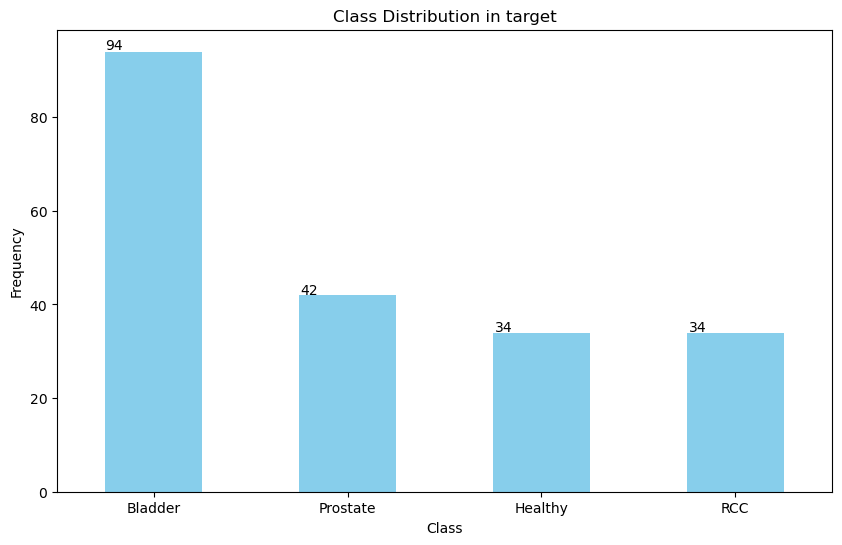

In [13]:

preprocessing.plot_class_distribution(EndMotif_t)

In [14]:


TEST_SIZE = 0.3
CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t, test_size=TEST_SIZE)

Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)




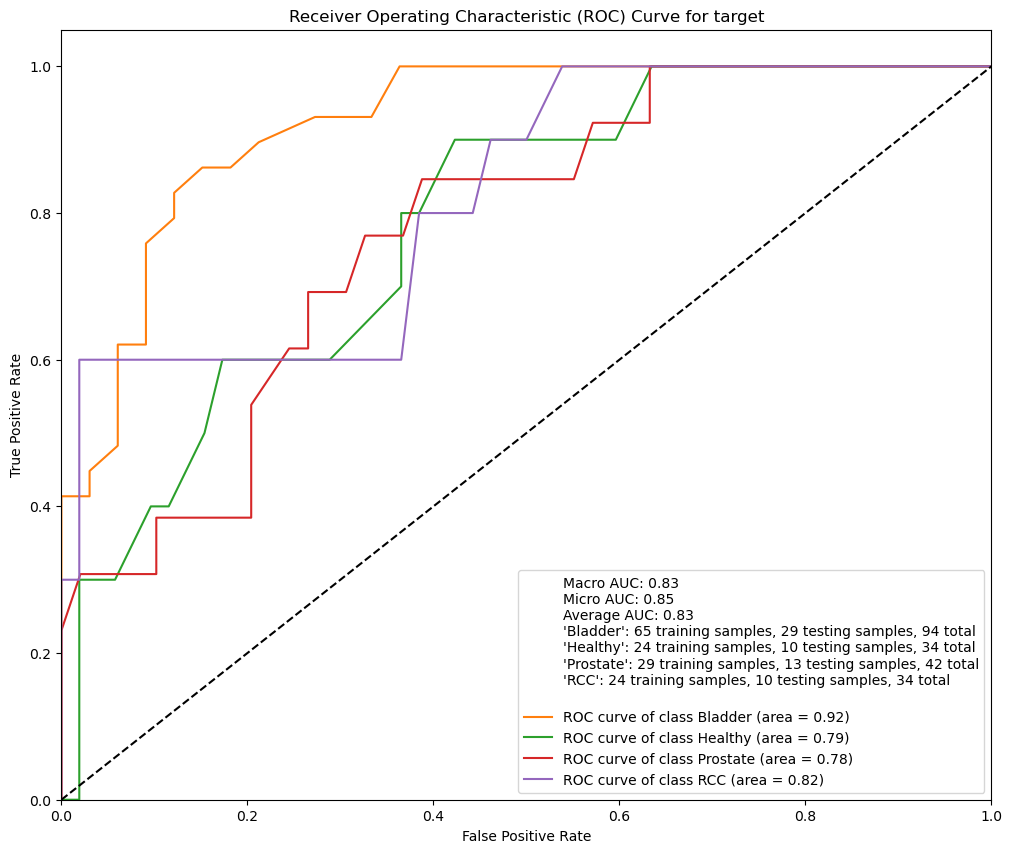

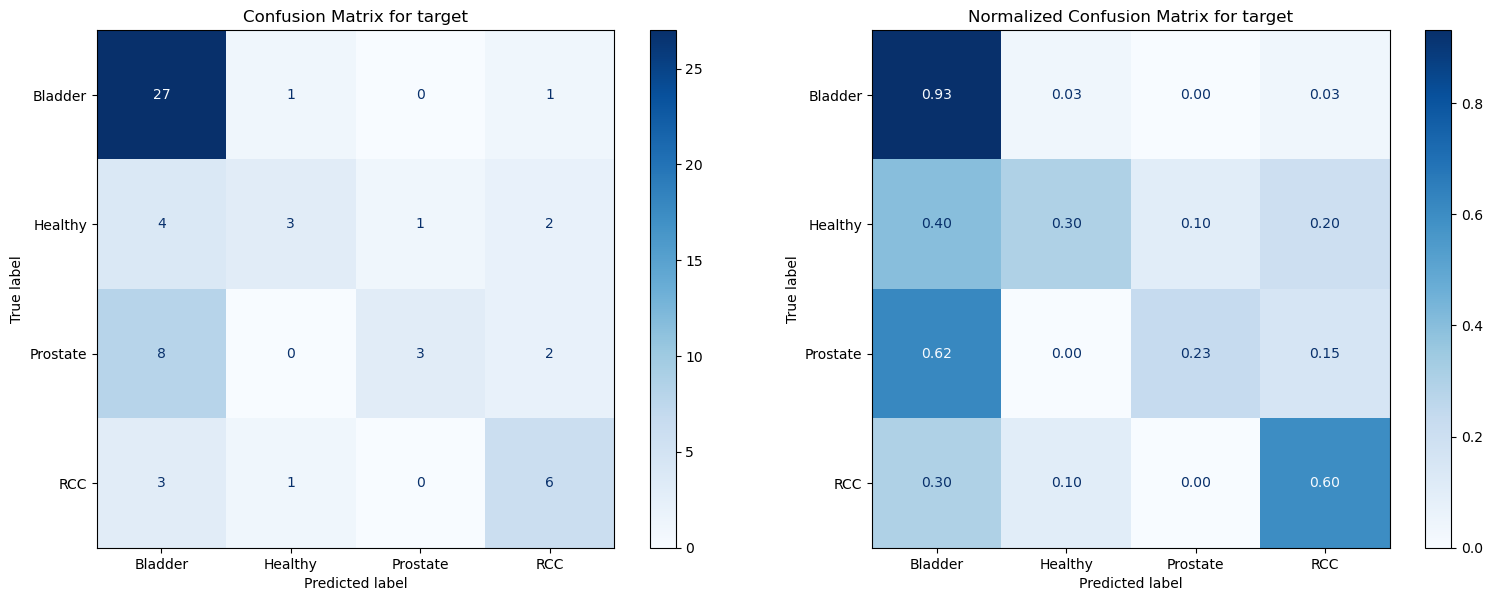

In [15]:
EndMotif_rf = models.train_model(EndMotif_train, EndMotif_test)

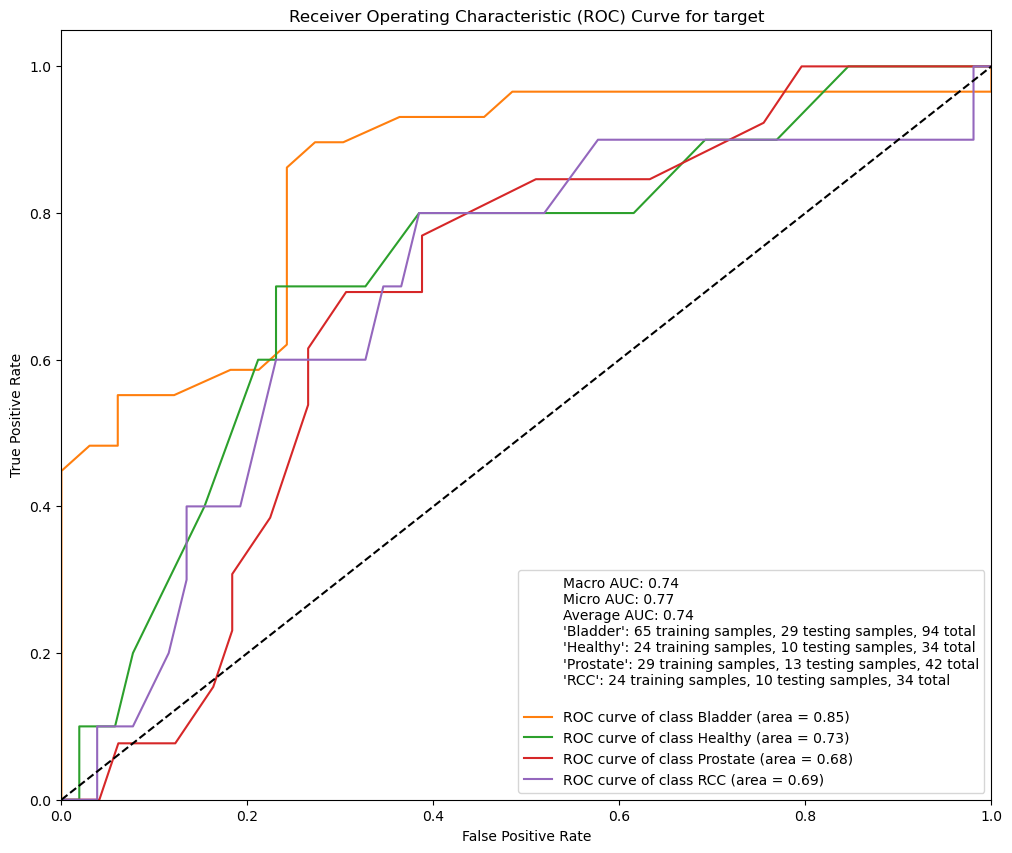

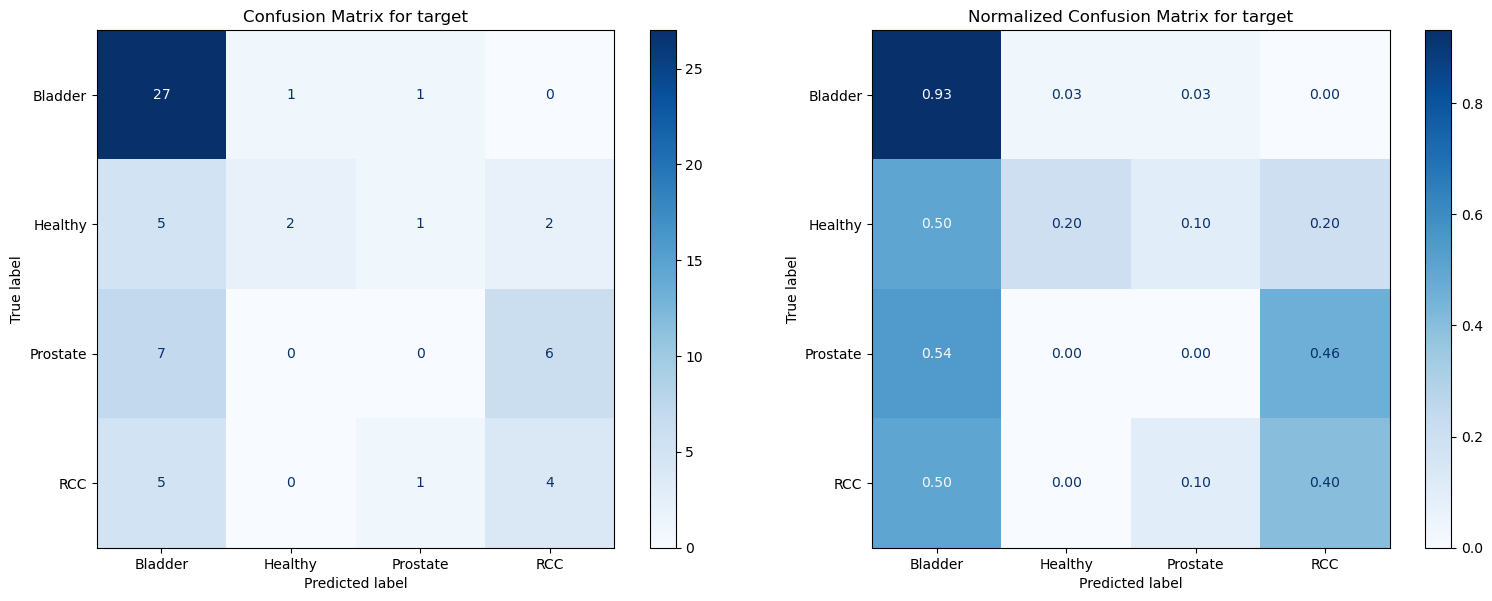

In [16]:
Ratio_rf = models.train_model(Ratio_train, Ratio_test)

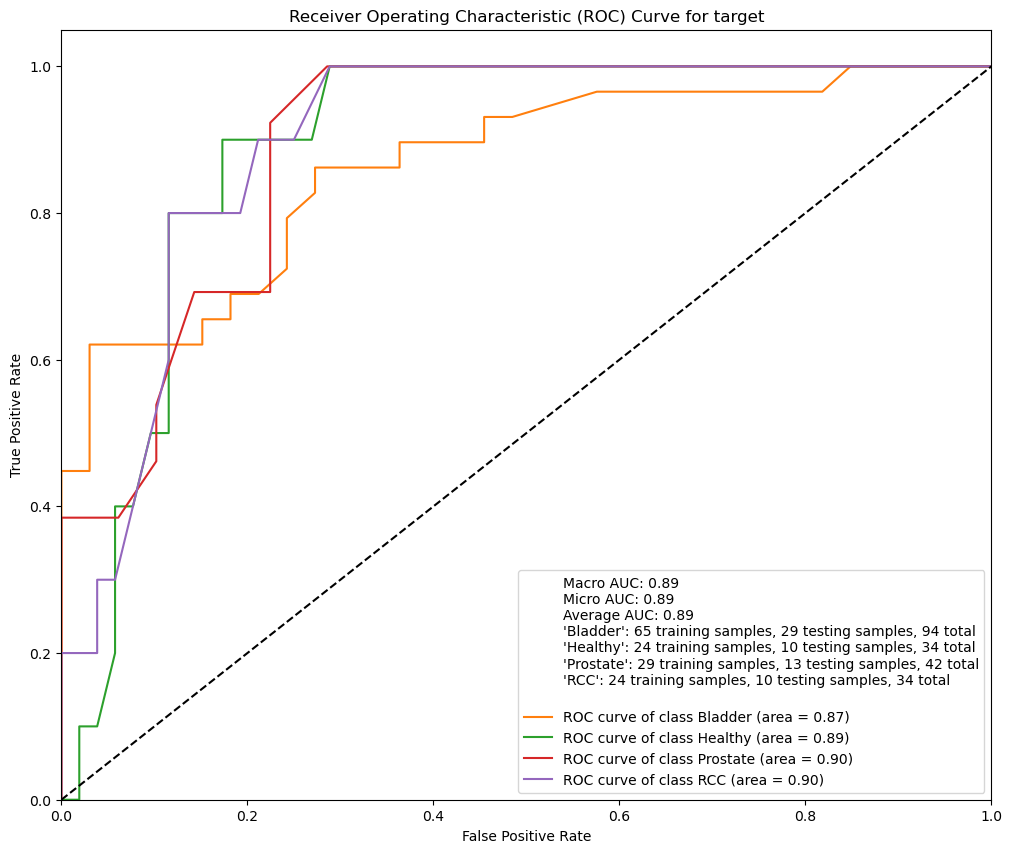

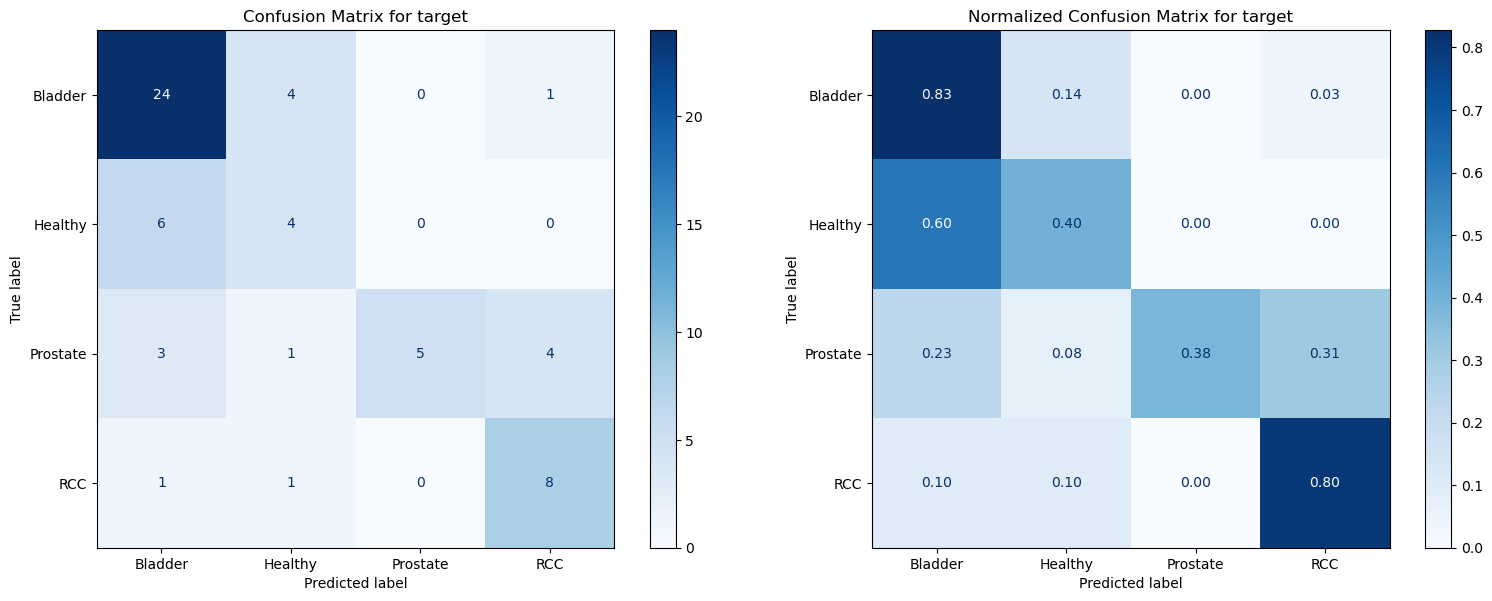

In [17]:
CNA_rf = models.train_model(CNA_train, CNA_test)

# Meta Model

## Combine all features to a single dataframe

In [18]:

CNA_scaled = preprocessing.standardize_dataframe(CNA_t)
Ratio_scaled = preprocessing.standardize_dataframe(Ratio_t)
EndMotif_scaled = preprocessing.standardize_dataframe(EndMotif_t)





# CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

# Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

# EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)

display(CNA_scaled.head())

,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,chr14_q,...,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q,target
58,0.169784,-0.129438,-0.317236,0.318629,0.279015,0.191110,0.014564,-0.346212,0.264312,0.222873,...,0.229114,-0.129854,0.000595,-0.432360,-0.225911,0.276817,-0.456559,0.033678,0.328817,Healthy
73,-0.624495,-0.526008,-0.163960,0.265455,0.657734,0.044760,-0.108131,-0.400778,0.532228,-0.042981,...,0.150339,-0.509018,0.553924,-0.271475,0.066946,0.325159,-0.244212,0.292246,0.366049,Healthy
74,-0.292244,-0.229714,-0.035631,0.140910,0.207100,-0.116667,-0.168926,-0.336693,0.347668,0.107739,...,0.343683,-0.124762,0.232607,-0.308870,-0.192799,0.279196,-0.332871,0.139458,0.177978,Healthy
81,-0.782727,0.063241,-0.384740,0.305804,0.928038,0.305073,-0.582530,-0.419853,0.393890,-0.360863,...,0.229337,-0.872935,0.840160,-0.156231,0.239087,0.477484,-0.123458,0.194178,0.379331,Healthy
83,-0.098234,-0.094089,-0.364356,0.273073,0.399939,0.180254,0.068668,-0.337713,0.300529,0.199064,...,0.546417,-0.131402,0.269051,-0.235941,-0.156411,0.215441,-0.244681,0.211962,0.228682,Healthy


In [19]:
preprocessing.check_scaling(CNA_scaled)

Means:
 chr1_p    -1.959217e-17
chr1_q     1.741526e-17
chr10_p   -3.483053e-17
chr10_q   -7.836868e-17
chr11_p    8.707632e-18
chr11_q    2.176908e-18
chr12_p   -2.176908e-17
chr12_q    4.353816e-17
chr13_q    1.741526e-17
chr14_q    8.707632e-18
chr15_q    1.741526e-17
chr16_p    4.353816e-17
chr16_q    3.918434e-17
chr17_p   -3.483053e-17
chr17_q    1.741526e-17
chr18_p    2.612289e-17
chr18_q    2.612289e-17
chr19_p   -2.176908e-18
chr2_p    -2.612289e-17
chr2_q    -8.707632e-18
chr20_p    8.707632e-18
chr20_q    8.707632e-18
chr21_q    1.306145e-17
chr22_q    1.741526e-17
chr3_p    -2.176908e-18
chr3_q     8.707632e-18
chr4_p     1.741526e-17
chr4_q    -3.483053e-17
chr5_p     1.044916e-16
chr5_q     2.612289e-17
chr6_p     0.000000e+00
chr6_q     1.741526e-17
chr7_p    -2.884403e-17
chr7_q     1.088454e-17
chr8_p    -4.353816e-17
chr8_q    -6.966105e-17
chr9_p    -8.707632e-18
chr9_q     1.219068e-16
dtype: float64
Standard Deviations:
 chr1_p     1.00246
chr1_q     1.00246
chr10

(chr1_p    -1.959217e-17
 chr1_q     1.741526e-17
 chr10_p   -3.483053e-17
 chr10_q   -7.836868e-17
 chr11_p    8.707632e-18
 chr11_q    2.176908e-18
 chr12_p   -2.176908e-17
 chr12_q    4.353816e-17
 chr13_q    1.741526e-17
 chr14_q    8.707632e-18
 chr15_q    1.741526e-17
 chr16_p    4.353816e-17
 chr16_q    3.918434e-17
 chr17_p   -3.483053e-17
 chr17_q    1.741526e-17
 chr18_p    2.612289e-17
 chr18_q    2.612289e-17
 chr19_p   -2.176908e-18
 chr2_p    -2.612289e-17
 chr2_q    -8.707632e-18
 chr20_p    8.707632e-18
 chr20_q    8.707632e-18
 chr21_q    1.306145e-17
 chr22_q    1.741526e-17
 chr3_p    -2.176908e-18
 chr3_q     8.707632e-18
 chr4_p     1.741526e-17
 chr4_q    -3.483053e-17
 chr5_p     1.044916e-16
 chr5_q     2.612289e-17
 chr6_p     0.000000e+00
 chr6_q     1.741526e-17
 chr7_p    -2.884403e-17
 chr7_q     1.088454e-17
 chr8_p    -4.353816e-17
 chr8_q    -6.966105e-17
 chr9_p    -8.707632e-18
 chr9_q     1.219068e-16
 dtype: float64,
 chr1_p     1.00246
 chr1_q     1

In [20]:
preprocessing.check_scaling(EndMotif_scaled)

Means:
 AAAA    3.134747e-16
AAAC   -1.741526e-17
AAAG   -3.069440e-15
AAAT   -2.438137e-16
AACA   -8.707632e-18
            ...     
TTGT   -9.360704e-16
TTTA   -1.480297e-16
TTTC   -2.673243e-15
TTTG    1.306145e-16
TTTT   -1.480297e-16
Length: 256, dtype: float64
Standard Deviations:
 AAAA    1.00246
AAAC    1.00246
AAAG    1.00246
AAAT    1.00246
AACA    1.00246
         ...   
TTGT    1.00246
TTTA    1.00246
TTTC    1.00246
TTTG    1.00246
TTTT    1.00246
Length: 256, dtype: float64


(AAAA    3.134747e-16
 AAAC   -1.741526e-17
 AAAG   -3.069440e-15
 AAAT   -2.438137e-16
 AACA   -8.707632e-18
             ...     
 TTGT   -9.360704e-16
 TTTA   -1.480297e-16
 TTTC   -2.673243e-15
 TTTG    1.306145e-16
 TTTT   -1.480297e-16
 Length: 256, dtype: float64,
 AAAA    1.00246
 AAAC    1.00246
 AAAG    1.00246
 AAAT    1.00246
 AACA    1.00246
          ...   
 TTGT    1.00246
 TTTA    1.00246
 TTTC    1.00246
 TTTG    1.00246
 TTTT    1.00246
 Length: 256, dtype: float64)

# Ratio fix

In [21]:
print(Ratio_scaled.shape)
print(CNA_scaled.shape)
print(EndMotif_scaled.shape)

(204, 313)
(204, 39)
(204, 257)


# Pan Feature

In [22]:
import preprocessing

combined_df = preprocessing.combine_feature_dfs_with_target([(CNA_scaled, 'CNA_'), (Ratio_scaled, 'Ratio_'), (EndMotif_scaled, 'EndMotif_')])

display(combined_df)

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
58,0.169784,-0.129438,-0.317236,0.318629,0.279015,0.191110,0.014564,-0.346212,0.264312,0.222873,...,0.186012,-0.108120,0.128740,0.105909,-0.209139,0.217909,0.163088,0.088214,-0.526086,Healthy
73,-0.624495,-0.526008,-0.163960,0.265455,0.657734,0.044760,-0.108131,-0.400778,0.532228,-0.042981,...,-0.660387,-0.935463,-0.703987,-0.713162,-0.749639,-1.412614,-1.463471,-1.430171,-1.113512,Healthy
74,-0.292244,-0.229714,-0.035631,0.140910,0.207100,-0.116667,-0.168926,-0.336693,0.347668,0.107739,...,1.189428,0.008643,0.304042,0.107297,0.149149,0.162881,0.670012,0.189331,1.171464,Healthy
81,-0.782727,0.063241,-0.384740,0.305804,0.928038,0.305073,-0.582530,-0.419853,0.393890,-0.360863,...,0.194657,0.137906,0.096330,0.144374,0.293967,-0.092719,-0.375543,-0.134017,-0.286540,Healthy
83,-0.098234,-0.094089,-0.364356,0.273073,0.399939,0.180254,0.068668,-0.337713,0.300529,0.199064,...,-3.632416,-1.156840,-1.213957,0.231492,-1.880351,-1.655101,-2.212069,-1.308913,-2.722745,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1317_UC1,0.107269,0.076002,-0.033251,-0.073987,-0.136200,0.314881,-0.186351,-0.256805,-0.013481,0.124337,...,0.408147,0.890428,0.254015,0.176774,0.640557,0.672653,0.736896,0.921531,0.702575,Bladder
WBC1318_UC1,-0.037150,-0.164364,-0.088425,0.120362,0.236166,-0.073613,-0.074037,-0.254015,0.173632,0.114438,...,-0.310693,-0.234761,-0.282124,-0.121359,0.170317,-0.327300,-0.345892,-0.120791,-0.098352,Bladder
WBC1320_UC1,-0.196913,-0.256357,-0.180471,0.188506,0.323190,0.065602,-0.028980,-0.185844,0.146377,0.149716,...,4.247695,5.556748,4.584939,5.937487,7.114824,1.043101,1.221872,2.160330,-0.110596,Bladder
WBC1322_UC1,-0.756668,-0.659734,-0.393711,-0.136685,0.026943,-0.317238,-0.335784,-0.543097,-0.217909,-0.067660,...,-1.186505,-0.687003,-0.913180,-0.945633,-1.345555,-1.364965,-1.315009,-1.012832,-0.339979,Bladder


In [23]:
# Assuming 'combined_df' is the DataFrame you've generated
# Split the DataFrame using the predefined function
train_df, test_df = preprocessing.stratified_train_test_split(combined_df, test_size=TEST_SIZE)

# Extract the feature subsets by prefix from train_df and test_df
CNA_train_df = preprocessing.filter_columns_by_prefix(train_df, 'CNA_')
Ratio_train_df = preprocessing.filter_columns_by_prefix(train_df, 'Ratio_')
EndMotif_train_df = preprocessing.filter_columns_by_prefix(train_df, 'EndMotif_')

CNA_test_df = preprocessing.filter_columns_by_prefix(test_df, 'CNA_')
Ratio_test_df = preprocessing.filter_columns_by_prefix(test_df, 'Ratio_')
EndMotif_test_df = preprocessing.filter_columns_by_prefix(test_df, 'EndMotif_')



In [24]:
display(EndMotif_train_df)

,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB-239_UC1,0.181524,-0.221714,-0.743460,-0.496964,-0.024615,0.868717,1.663163,0.037638,-0.050041,0.114252,...,0.818285,1.341527,1.608676,1.510848,1.405388,0.374307,0.716436,1.035135,0.757938,Prostate
PB-313_UC1,1.208353,-0.199745,-0.265071,-0.419995,1.613420,0.463405,-1.418655,-0.674258,0.356507,-1.148441,...,-0.455534,-1.470437,-1.444362,-0.826281,-0.550897,-0.943018,-1.374436,-1.601992,0.752047,Prostate
RCC013_UC2,0.286510,-0.144020,0.501287,-0.243483,-0.460319,-0.366433,0.414415,-0.387674,0.804278,0.360859,...,0.685017,0.439807,0.586962,0.477410,0.526591,0.230553,0.653336,0.556031,0.377698,RCC
PB-276_UC1,-0.219418,1.009840,0.517635,1.174868,1.157018,1.133800,-0.003599,1.306808,0.461751,0.227819,...,0.536169,-0.157774,-0.413797,-0.068879,0.084613,0.676034,0.223049,0.115052,-0.363400,Prostate
WBC1206_UC1,1.008728,-0.607439,-0.698888,-0.048113,-0.178175,-1.212180,0.382350,-0.640441,2.260668,0.437910,...,2.392812,0.765110,0.241487,-0.150668,1.325919,1.374970,0.642669,0.481330,1.056431,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,-0.841879,0.517377,0.144553,0.716405,1.508796,0.981213,-0.509417,1.076174,-0.997675,-0.659551,...,-1.475508,-0.823070,-0.891812,-0.382389,-0.714391,-0.952003,-1.353782,-1.112049,-1.347087,RCC
PB032_UC1,-0.143974,1.063708,0.489340,0.761094,1.779392,0.927845,-0.270559,0.874658,0.681507,0.426876,...,-0.049872,-0.152372,-0.392720,-0.187358,0.330488,0.087504,-0.404516,-0.205754,-0.775710,Prostate
BC009_UC1,1.091161,-0.206241,-0.165696,-0.348393,1.068279,-0.981808,-1.860473,-1.038310,-0.146329,-2.013728,...,-0.134831,-1.413053,-1.578269,-1.538313,-1.051990,-0.302732,-0.523967,-1.282438,0.707864,Bladder
WBC1222_UC1,0.758013,-3.840786,-3.786578,-4.545704,-3.427549,-0.632373,0.624937,-3.577697,-2.624451,-1.177956,...,-1.362239,-0.816448,0.648119,1.273458,-1.152913,-3.928102,-2.450023,-1.716930,2.338381,Bladder


In [25]:
display(CNA_train_df)

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,CNA_chr5_q,CNA_chr6_p,CNA_chr6_q,CNA_chr7_p,CNA_chr7_q,CNA_chr8_p,CNA_chr8_q,CNA_chr9_p,CNA_chr9_q,target
PB-239_UC1,0.117272,-0.221939,-0.070310,0.163572,0.157982,0.052835,0.039690,-0.090047,0.104980,0.275538,...,0.389549,-0.008876,0.033258,-0.377262,-0.242971,0.298170,-0.427280,0.012730,0.305356,Prostate
PB-313_UC1,0.794648,0.089060,0.068117,0.347522,0.294713,0.125144,-0.200687,-0.228360,-0.850086,0.303084,...,0.266829,-0.052109,-0.770962,-0.004021,0.044743,0.372384,-0.589641,-0.286786,0.590503,Prostate
RCC013_UC2,-0.174759,-0.242226,-0.219963,0.163209,0.302970,0.092108,-0.005611,-0.205461,0.269528,0.097365,...,0.327446,-0.171882,0.310315,-0.301963,-0.155040,0.367651,-0.288337,0.188137,0.274578,RCC
PB-276_UC1,-0.195295,-0.384208,0.365251,1.165236,0.139979,0.100905,-0.104622,-0.347875,0.153107,0.010788,...,0.136672,-0.291926,-0.070608,-0.276665,-0.042971,0.147252,-0.513568,0.040991,0.356512,Prostate
WBC1206_UC1,0.040960,-0.109850,-0.616490,-0.220045,0.383187,0.225369,-0.285871,-0.570340,0.397159,0.205319,...,0.203361,-0.371461,0.017218,-0.136664,-0.172754,0.246134,0.156682,-0.058814,0.388567,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,-0.155815,-0.357874,0.477735,1.073597,0.241979,-0.034633,0.046892,-0.376963,-0.019954,0.096108,...,0.259948,-0.131331,0.020654,-0.246074,-0.081121,0.139570,-0.429350,0.144866,0.232877,RCC
PB032_UC1,-0.435332,-0.598591,-0.325562,0.268508,0.377142,0.008307,0.018137,-0.338188,0.560849,0.047154,...,0.360577,-0.319887,0.536096,-0.214501,-0.268869,0.453779,-0.122015,0.352795,-0.038492,Prostate
BC009_UC1,-0.218254,-0.217159,-0.004289,0.173881,0.305925,0.107929,-0.185315,-0.141772,0.006943,0.223791,...,0.341252,-0.045030,-0.095124,-0.055631,-0.166824,0.436016,-0.127085,-0.033910,0.081978,Bladder
WBC1222_UC1,0.482171,-0.183158,0.493337,0.197610,-0.282918,-0.392414,-0.499348,-0.298340,-0.548513,0.509052,...,0.182029,0.079352,-1.340678,-0.334090,-0.870425,0.832200,-0.352937,-0.103182,0.568452,Bladder


Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


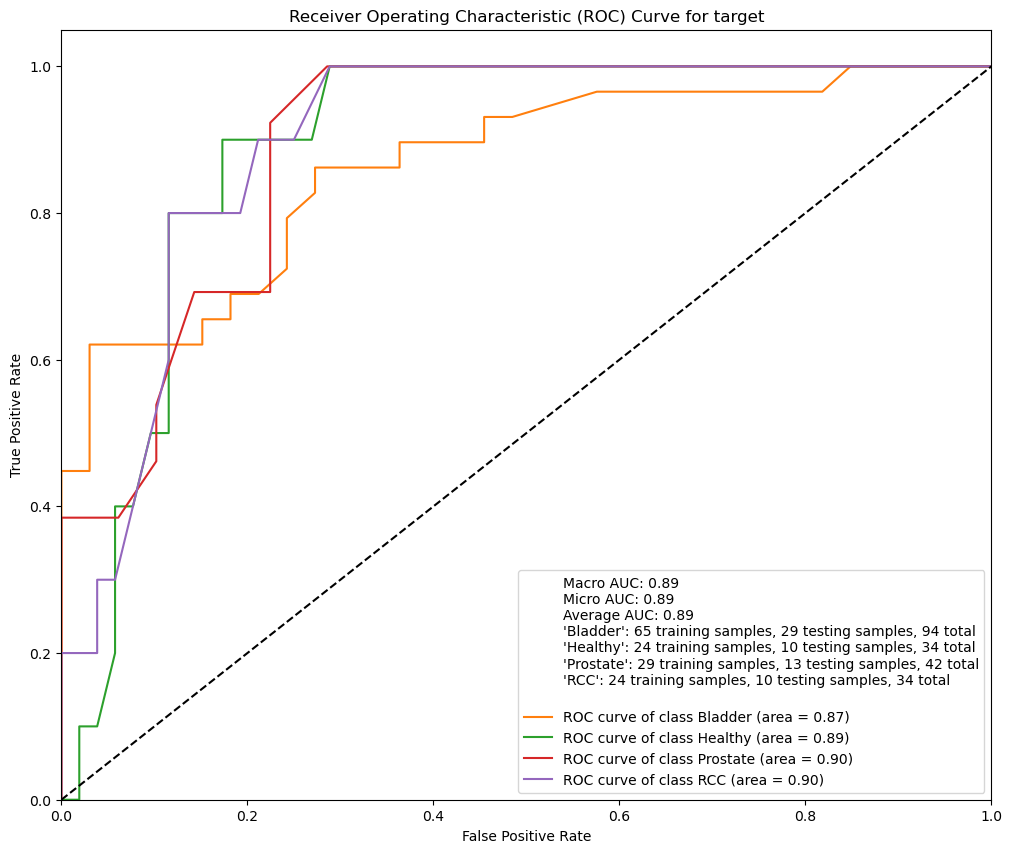

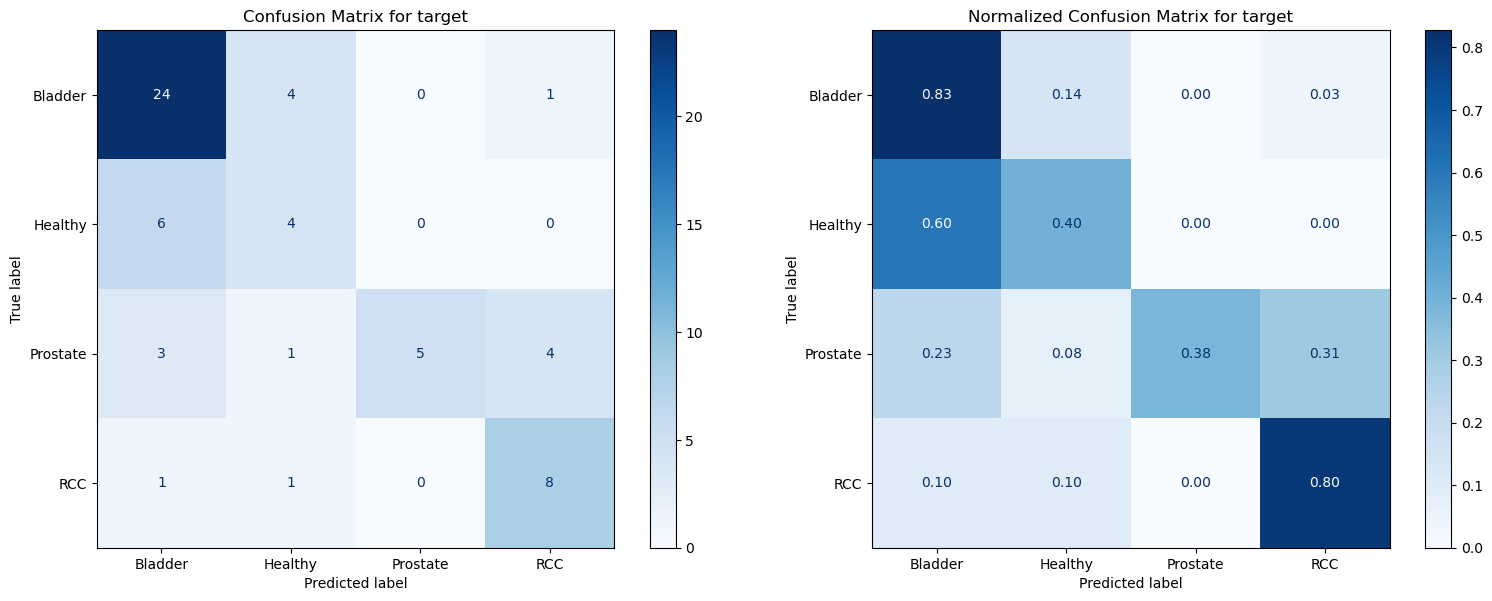

In [26]:
# # Train the models on their respective feature subsets using your train_model( function
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 500, 1000, 5000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='accuracy', search_method='grid')



Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 5000}


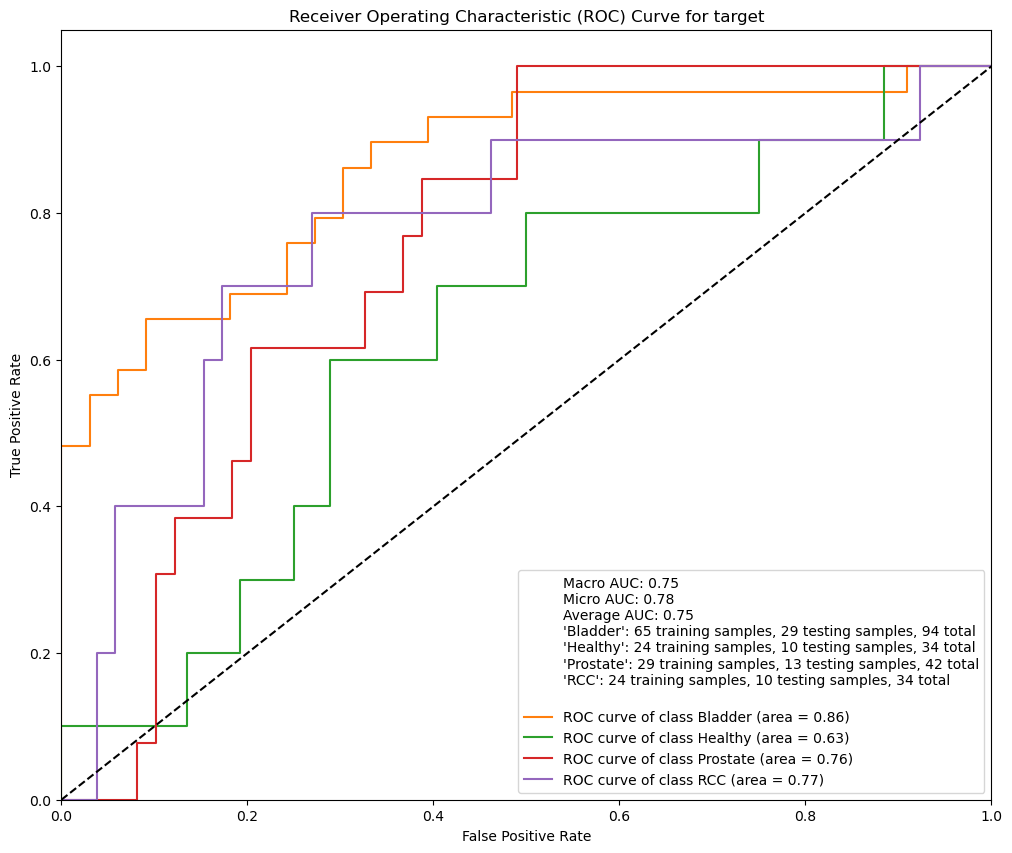

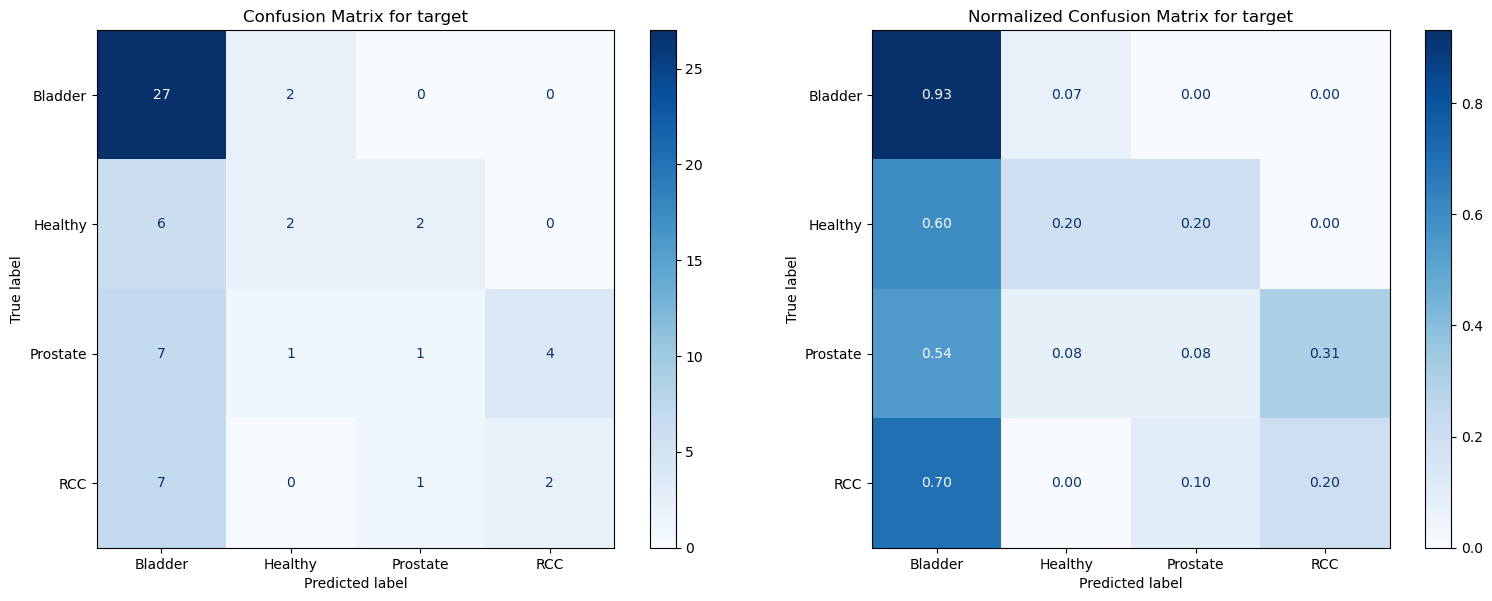

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 5000}


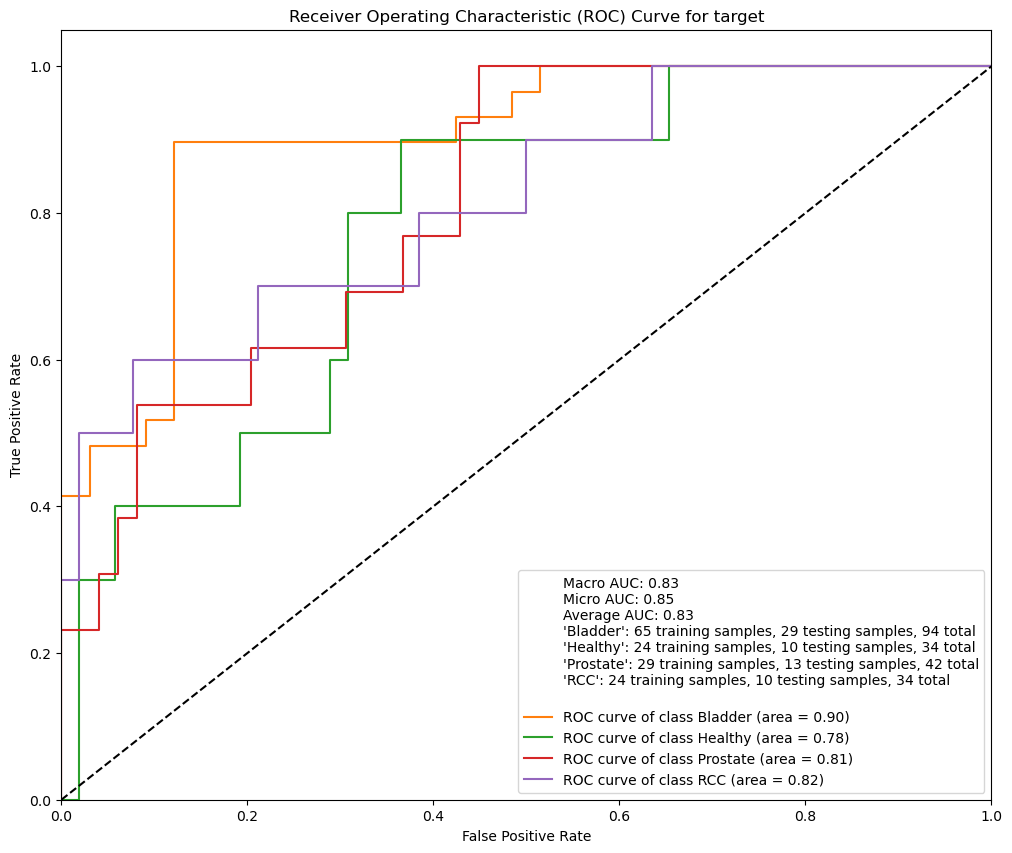

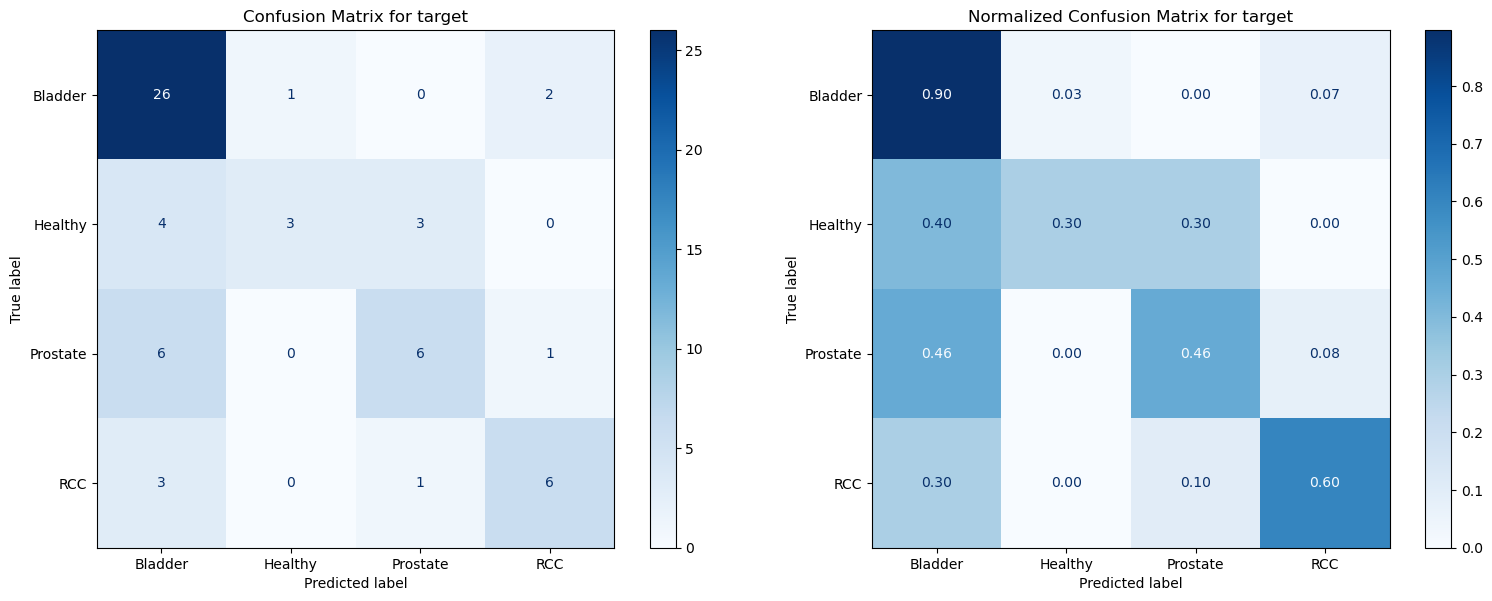

In [27]:
model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')


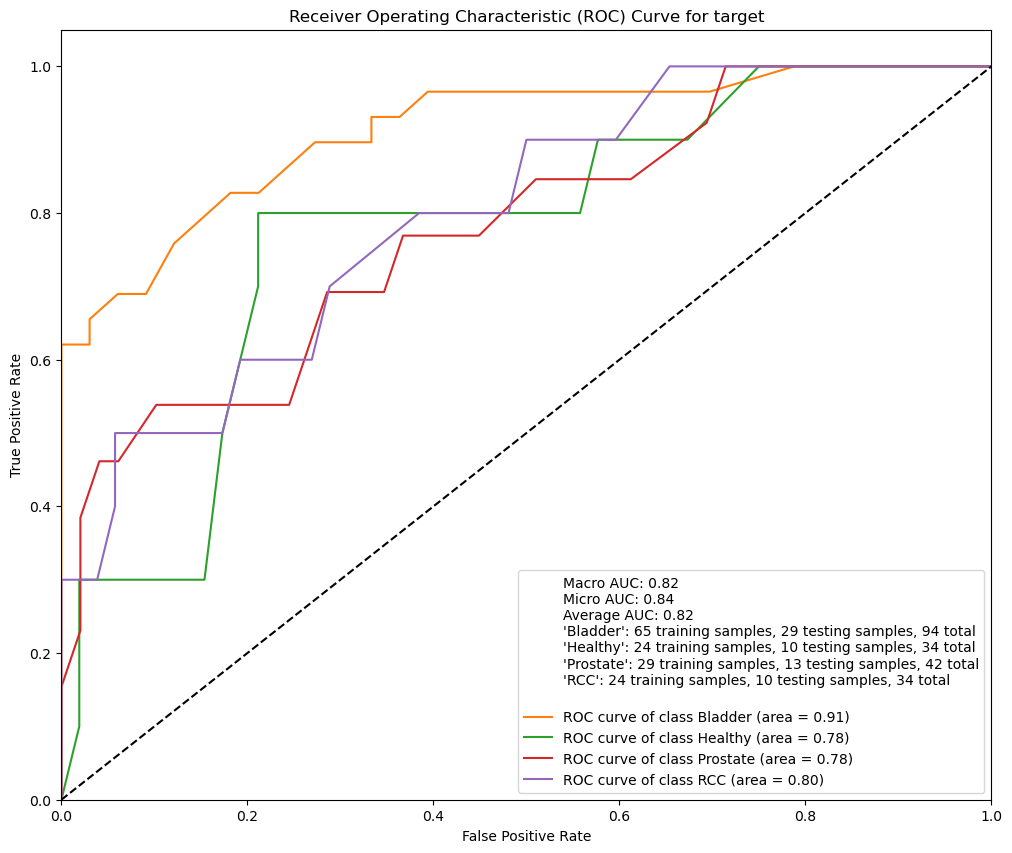

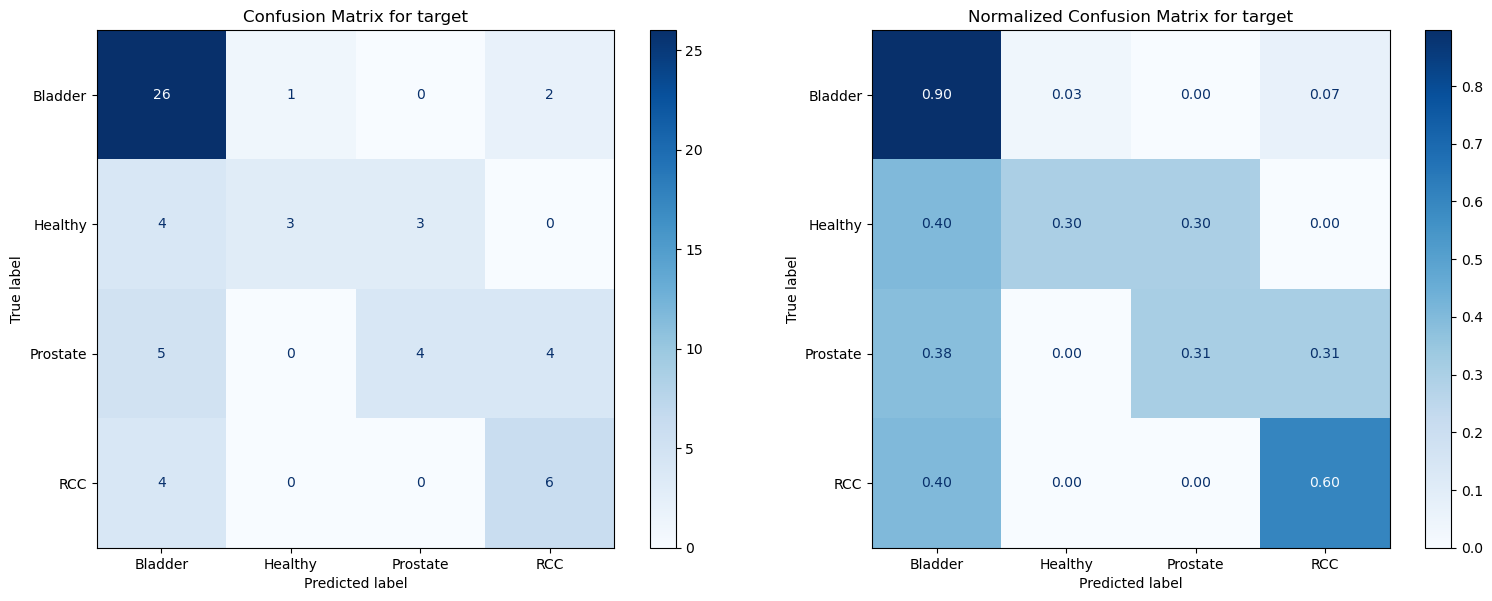

RandomForestClassifier(class_weight='balanced', random_state=0)

In [28]:
models.train_model(train_df, test_df)

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


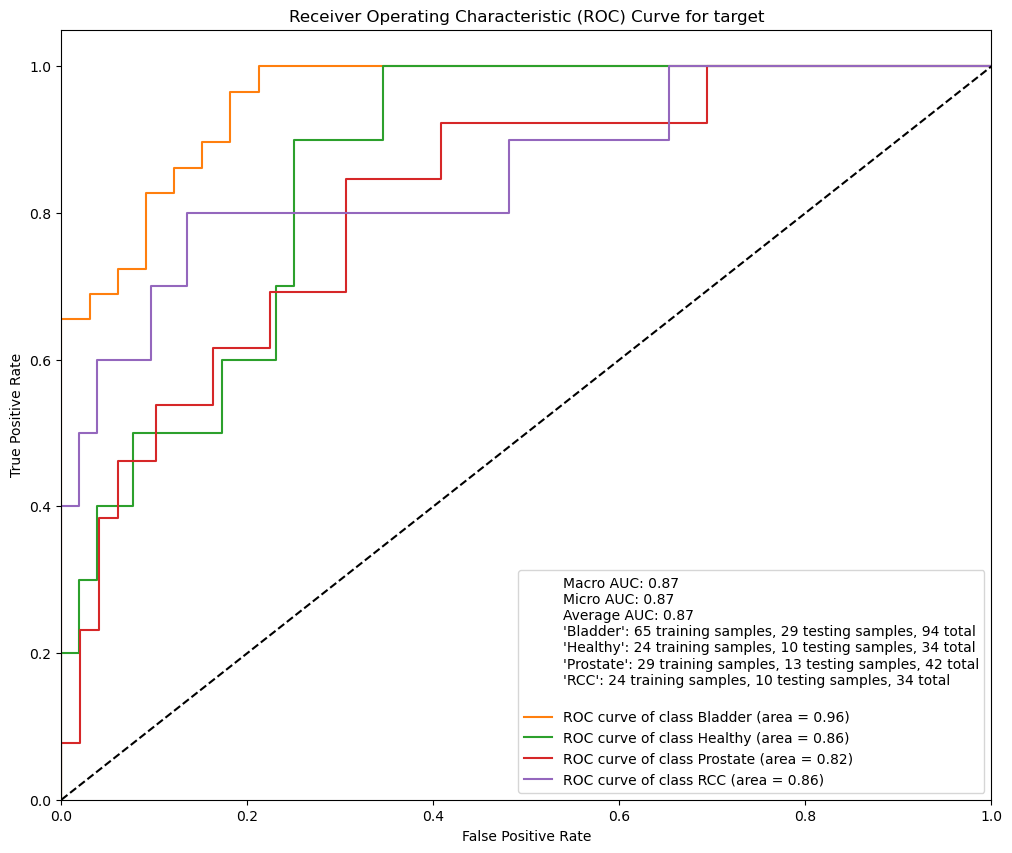

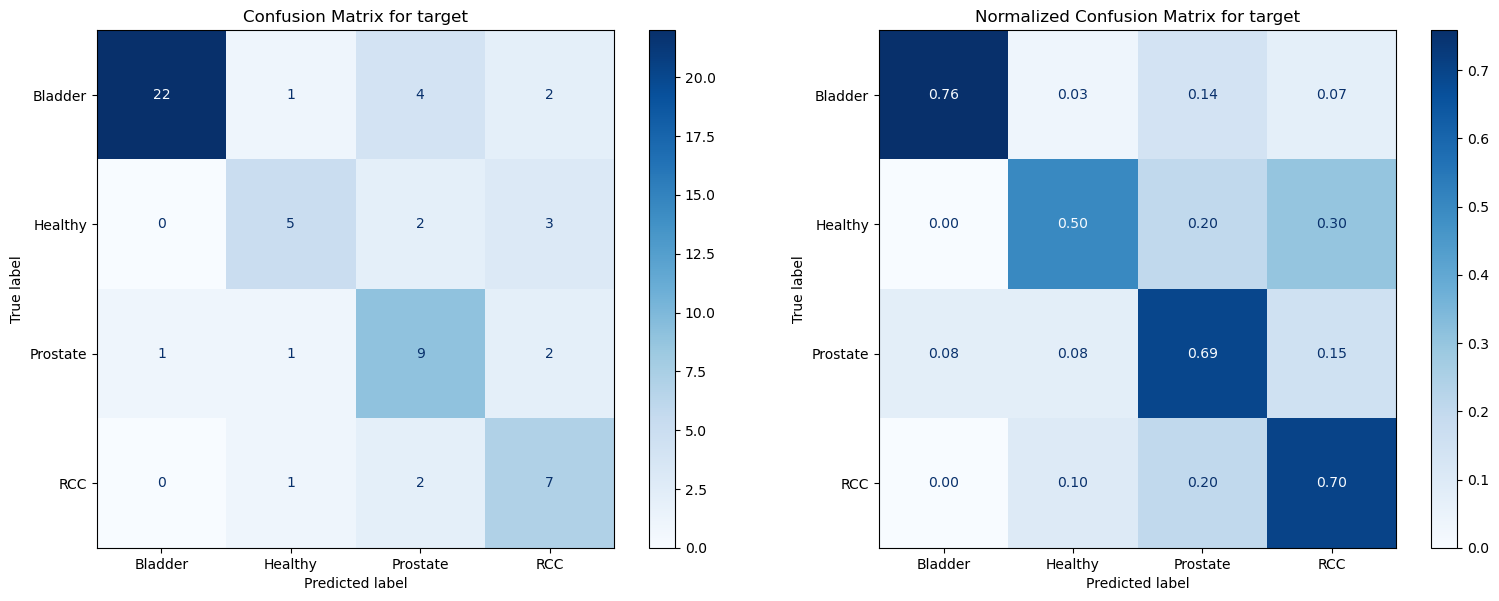

In [29]:

param_grid_log_reg = [
    {
        'penalty': ['l2'],         
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs'],       
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['l1', 'l2'],   
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],   
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],  # Only include 'elasticnet' here
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],         
        'max_iter': [200, 500, 1000],
        'l1_ratio': [0.5]           # Only used with 'elasticnet'
    }
]





#log_reg_model = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')




# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_df, 
        test_df, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)



Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


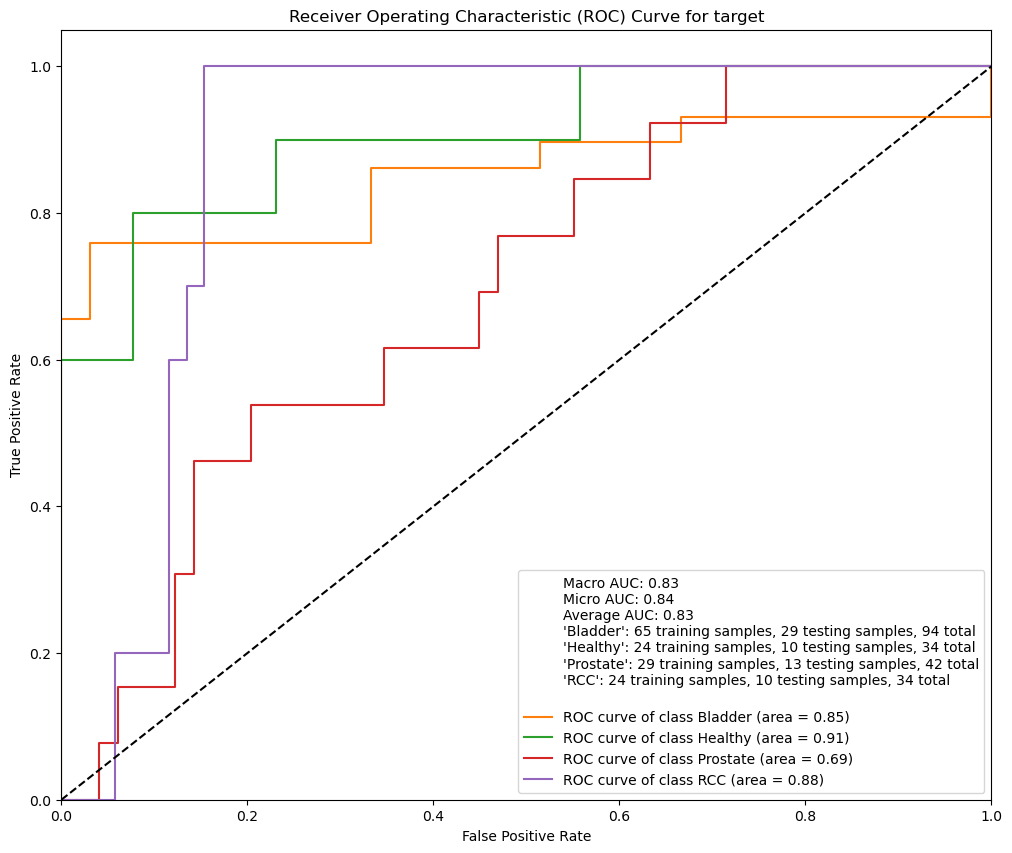

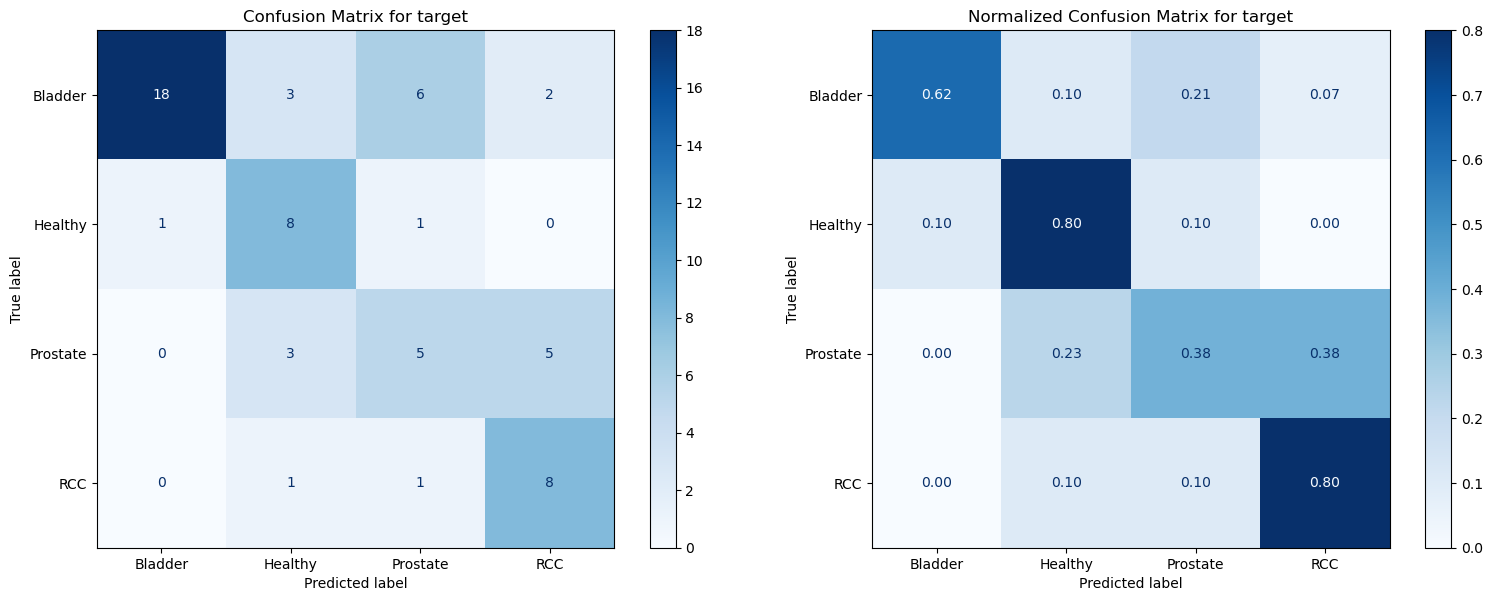

LogisticRegression(C=10, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear')

In [30]:





models.train_model(CNA_train_df, CNA_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')
    



Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


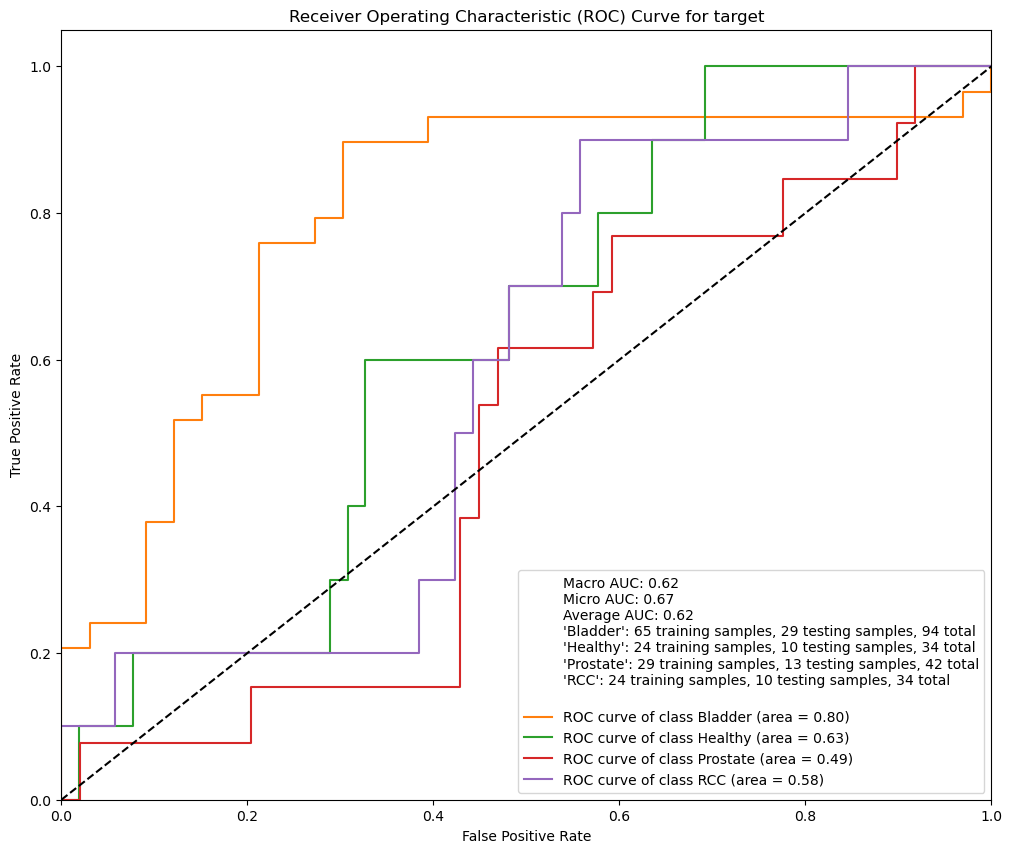

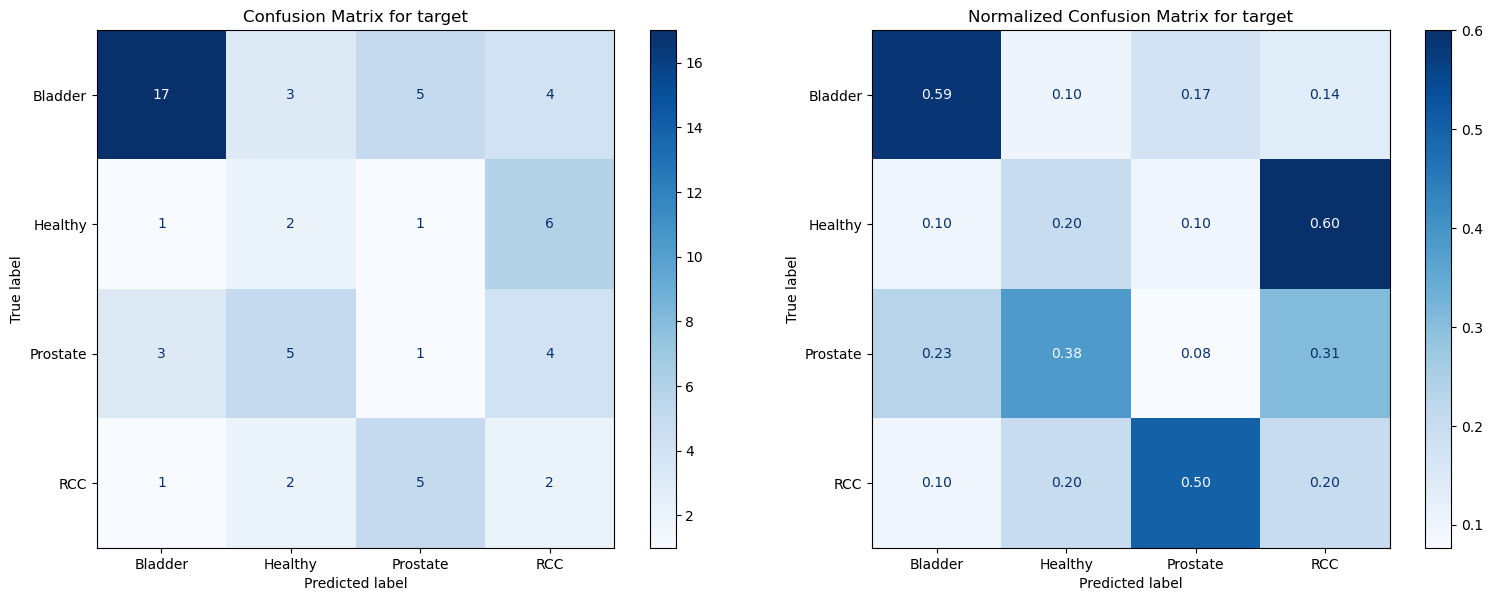

LogisticRegression(C=10, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear')

In [31]:


models.train_model(Ratio_train_df, Ratio_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


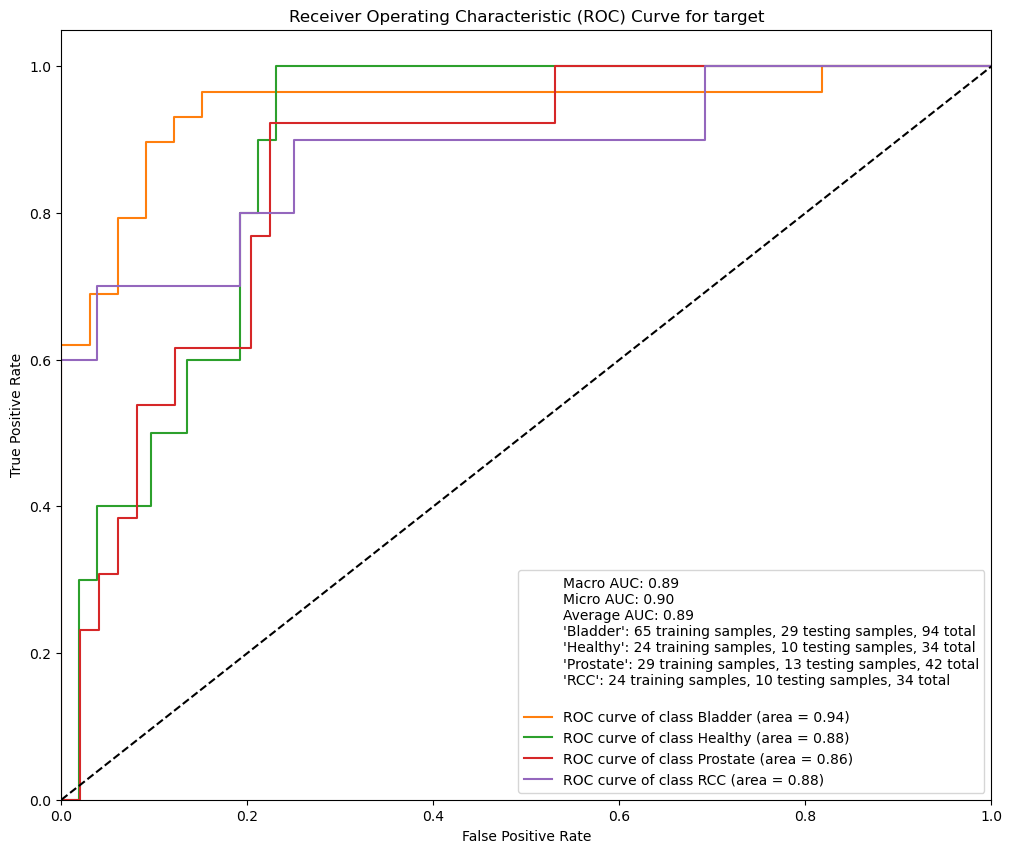

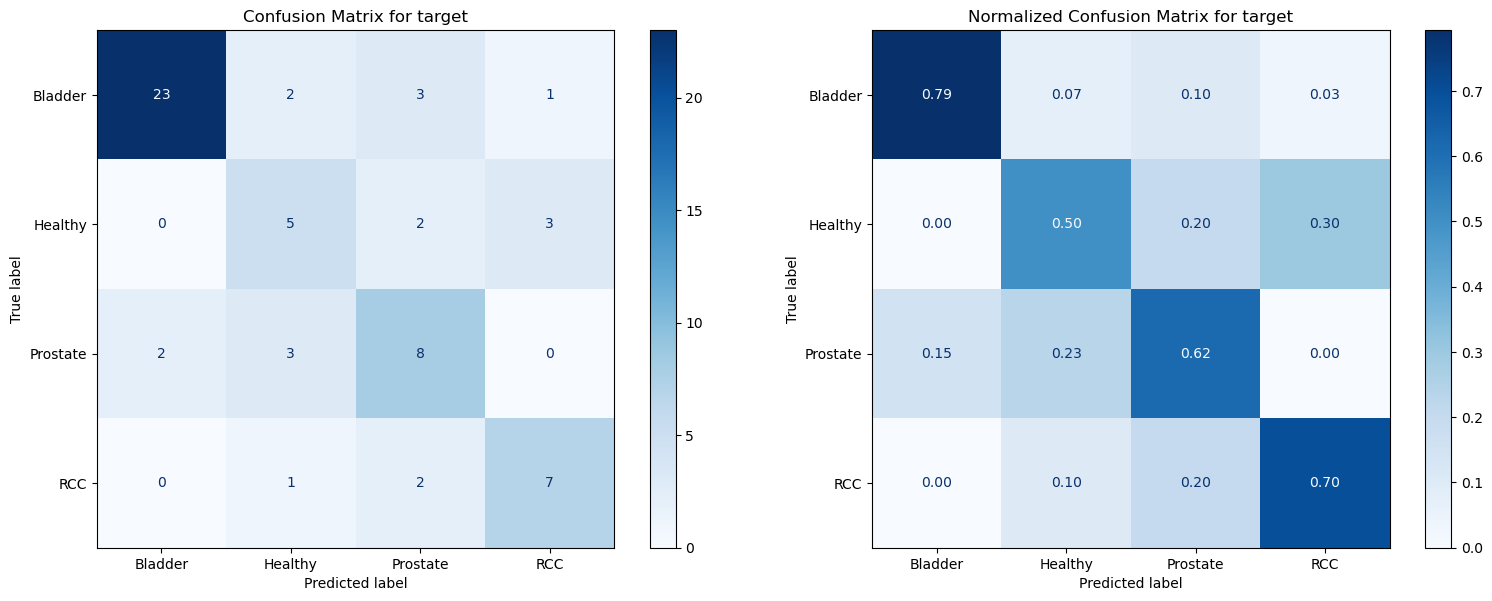

LogisticRegression(C=10, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [32]:
models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_macro',
            search_method='grid')

Best hyperparameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


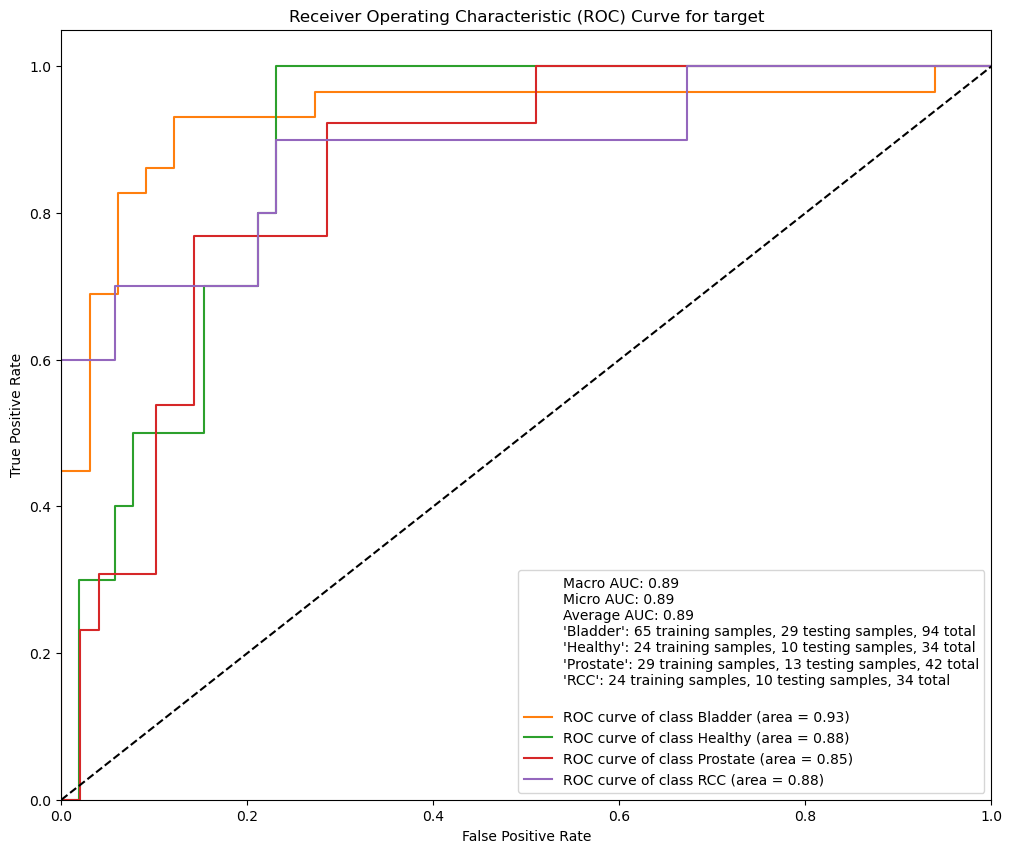

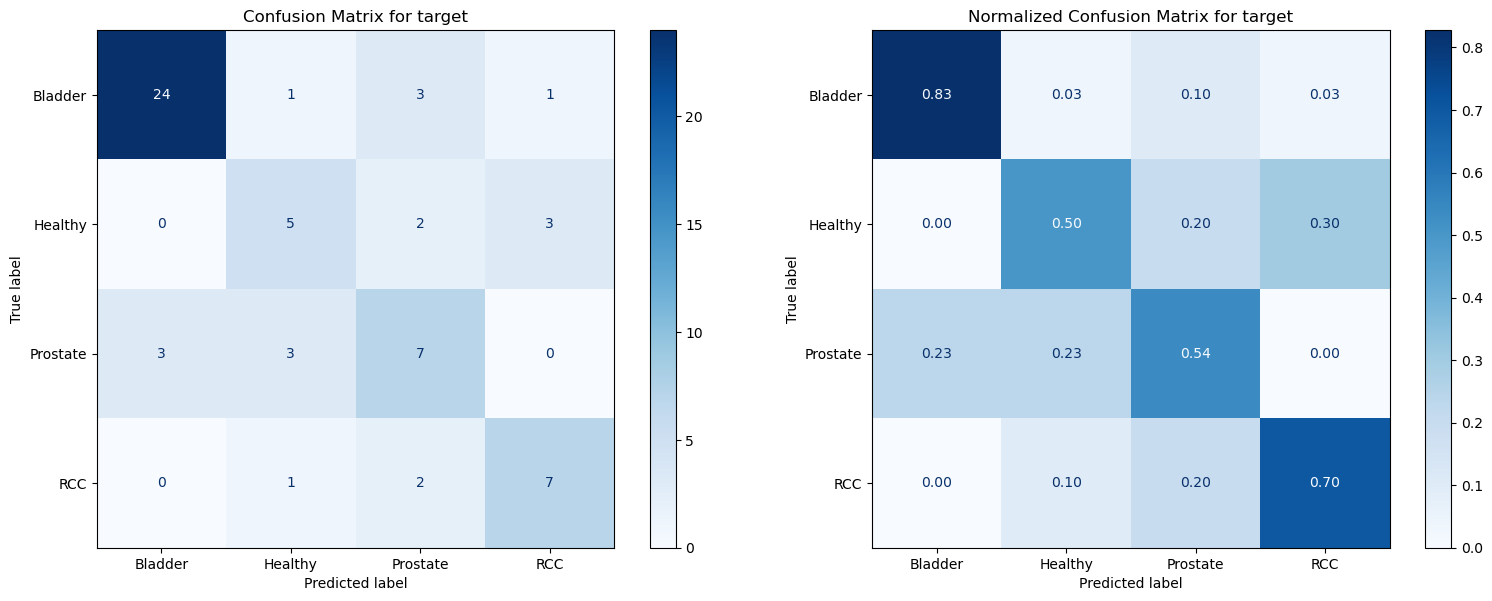

LogisticRegression(C=100, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [33]:

models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

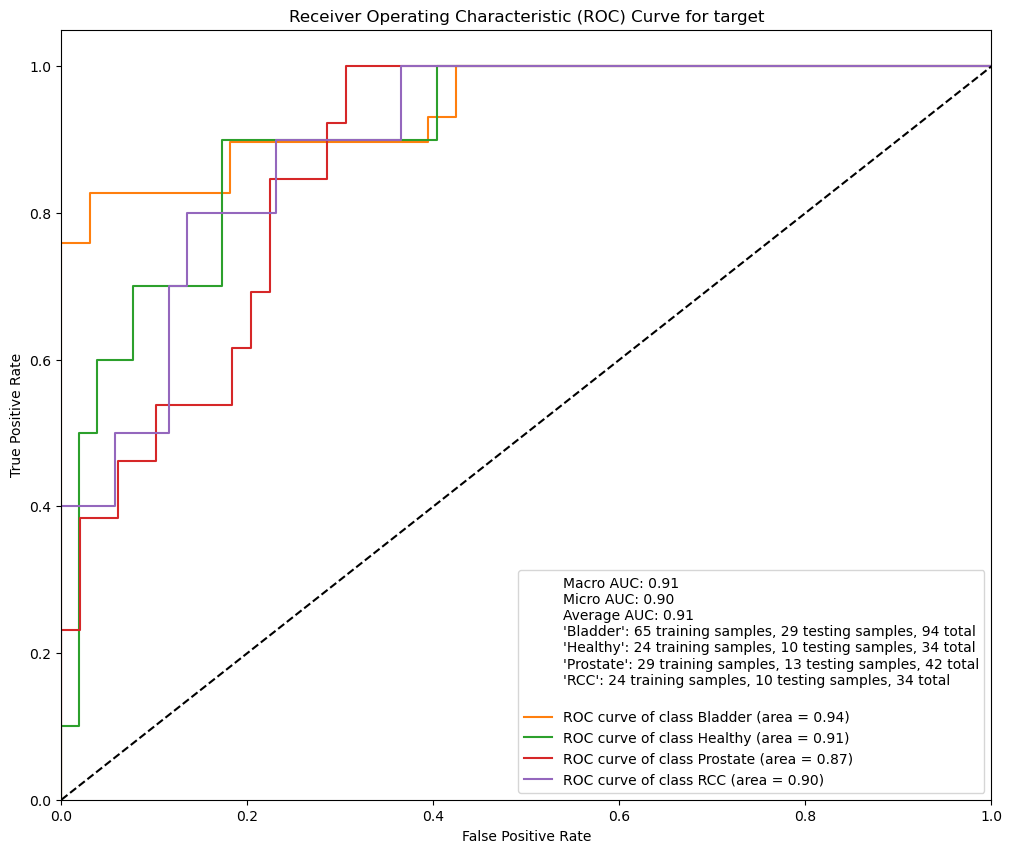

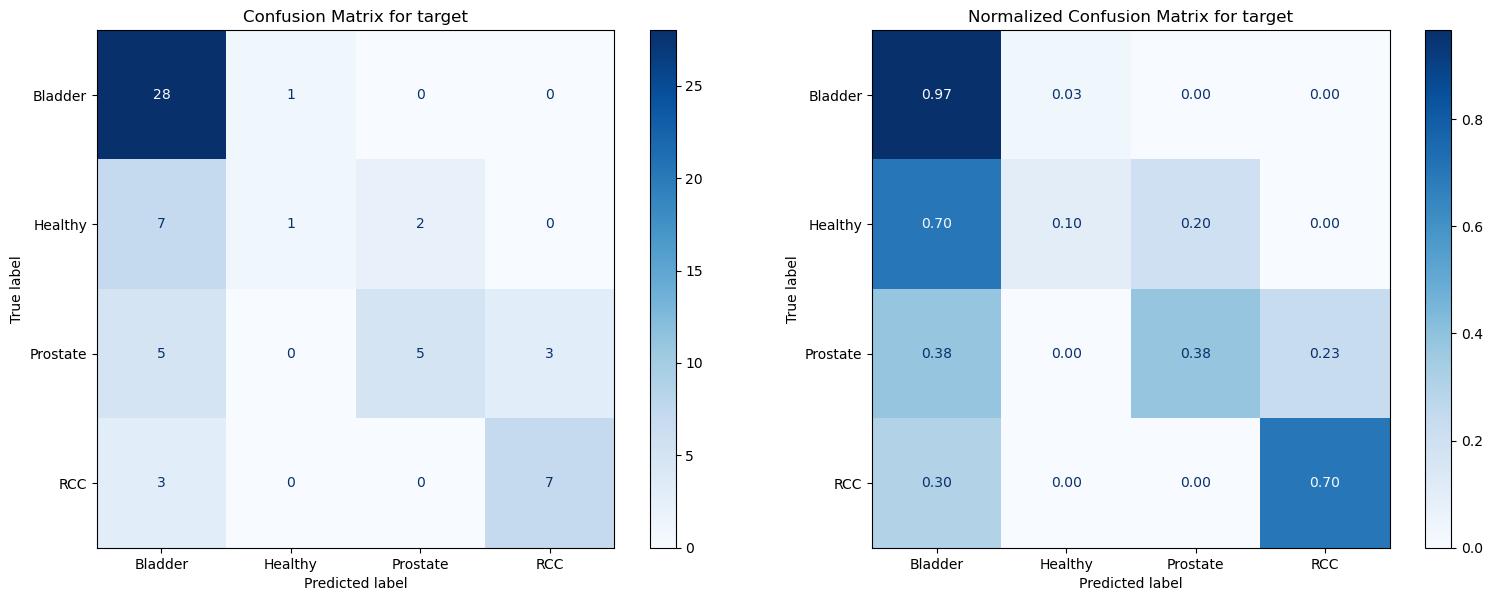

In [34]:
base_models = [model_CNA, model_Ratio, model_EndMotif]
train_dfs = [CNA_train_df, Ratio_train_df, EndMotif_train_df]
test_dfs = [CNA_test_df, Ratio_test_df, EndMotif_test_df]

meta_classifier = models.train_meta_classifier(base_models, train_dfs, test_dfs)

In [35]:
# from xgboost import XGBClassifier
# # Define your meta-classifier as XGBoost
# meta_classifier = XGBClassifier(random_state=0, n_estimators=100, learning_rate=0.1)

# Assuming base_models, train_dfs, and test_dfs are already defined
meta_classifier, y_meta_test_pred_decoded, y_meta_test = models.train_xgboost_meta_classifier(base_models, train_dfs, test_dfs)

# Output the true labels and the predicted labels
print("True labels:\n", y_meta_test.value_counts())
print("Predicted labels:\n", pd.Series(y_meta_test_pred_decoded).value_counts())

True labels:
 target
Bladder     29
Prostate    13
Healthy     10
RCC         10
Name: count, dtype: int64
Predicted labels:
 RCC        26
Bladder    19
Healthy    17
Name: count, dtype: int64


In [36]:
# model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



EndMotif_feature_importance = preprocessing.extract_feature_importances(model_EndMotif, EndMotif_train_df)

CNA_feature_importance = preprocessing.extract_feature_importances(model_CNA, CNA_train_df)

Ratio_feature_importance = preprocessing.extract_feature_importances(model_Ratio, Ratio_train_df)


In [37]:

print(EndMotif_feature_importance)

print(CNA_feature_importance)

print(Ratio_feature_importance)

           Feature  Importance
99   EndMotif_CGAT    0.011399
60   EndMotif_ATTA    0.010843
96   EndMotif_CGAA    0.010594
44   EndMotif_AGTA    0.009694
164  EndMotif_GGCA    0.008945
..             ...         ...
176  EndMotif_GTAA    0.001727
234  EndMotif_TGGG    0.001699
151  EndMotif_GCCT    0.001608
226  EndMotif_TGAG    0.001448
238  EndMotif_TGTG    0.001373

[256 rows x 2 columns]
        Feature  Importance
32   CNA_chr7_p    0.046510
6   CNA_chr12_p    0.046448
3   CNA_chr10_q    0.041653
37   CNA_chr9_q    0.040274
15  CNA_chr18_p    0.039925
35   CNA_chr8_q    0.036791
20  CNA_chr20_p    0.033339
30   CNA_chr6_p    0.032765
25   CNA_chr3_q    0.031556
2   CNA_chr10_p    0.030978
4   CNA_chr11_p    0.030942
34   CNA_chr8_p    0.030895
8   CNA_chr13_q    0.030500
21  CNA_chr20_q    0.029314
29   CNA_chr5_q    0.028625
24   CNA_chr3_p    0.028597
28   CNA_chr5_p    0.028159
19   CNA_chr2_q    0.025825
33   CNA_chr7_q    0.024839
22  CNA_chr21_q    0.024311
1    CNA_chr1_q 

In [60]:
# feature_importances_dict = {
#     'EndMotif': EndMotif_feature_importance,
#     'CNA': CNA_feature_importance,
#     'Ratio': Ratio_feature_importance
# }

feature_importances_dict = {
    'EndMotif': EndMotif_feature_importance,
    'CNA': CNA_feature_importance
    
}

train_subset, test_subset = preprocessing.subset_top_k_features(train_df, test_df, k=300, feature_importances_dict=feature_importances_dict, target_name='target')

display(train_subset.head())
display(test_subset.head())

,EndMotif_GAAG,EndMotif_GCGG,EndMotif_CCAT,EndMotif_AAGC,CNA_chr21_q,EndMotif_ACAC,EndMotif_TACC,EndMotif_GAAC,EndMotif_CCCC,EndMotif_TTAA,...,EndMotif_ATTA,EndMotif_TAGT,CNA_chr12_q,EndMotif_TCTC,EndMotif_GTCA,CNA_chr17_q,CNA_chr12_p,EndMotif_CAGA,EndMotif_CATG,target
PB-239_UC1,0.766573,1.196680,-0.966228,0.114252,0.248375,0.084001,0.105447,0.509023,-0.092921,0.567950,...,-0.566551,1.510445,-0.090047,0.478690,-0.061212,0.014701,0.039690,-0.343711,-0.624161,Prostate
PB-313_UC1,-1.544548,1.432601,-0.218182,-1.148441,-0.585479,-1.033834,0.410782,-1.930336,0.756946,-1.156733,...,-0.143684,-1.130608,-0.228360,0.245374,-0.460377,0.491773,-0.200687,-0.406171,0.412597,Prostate
RCC013_UC2,1.251823,-0.082980,-0.368538,0.360859,0.058514,0.399646,-0.160804,0.306227,-0.626887,0.139686,...,-0.337802,0.667653,-0.205461,0.529320,0.205372,-0.454803,-0.005611,0.592634,-0.297455,RCC
PB-276_UC1,-1.261485,-0.745706,0.590610,0.227819,-0.091422,-0.734106,-0.788718,-0.146955,0.202263,0.641144,...,1.093080,-0.910136,-0.347875,-1.037969,0.992504,-0.137494,-0.104622,0.948492,0.891031,Prostate
WBC1206_UC1,-1.454096,0.276099,-0.423238,0.437910,-0.106440,-1.431105,-0.038002,-0.378174,-0.484732,0.523056,...,-1.278834,-0.683676,-0.570340,-0.470782,0.113595,-0.354011,-0.285871,1.278611,-1.173278,Bladder


,EndMotif_GAAG,EndMotif_GCGG,EndMotif_CCAT,EndMotif_AAGC,CNA_chr21_q,EndMotif_ACAC,EndMotif_TACC,EndMotif_GAAC,EndMotif_CCCC,EndMotif_TTAA,...,EndMotif_ATTA,EndMotif_TAGT,CNA_chr12_q,EndMotif_TCTC,EndMotif_GTCA,CNA_chr17_q,CNA_chr12_p,EndMotif_CAGA,EndMotif_CATG,target
PB204_UC1,-0.945678,-0.221030,-0.167311,-0.024640,0.231196,-0.557787,-0.185108,-0.654039,-0.628949,0.443830,...,0.740734,-0.579356,-0.176413,-0.114649,0.422741,-0.154437,-0.056582,0.761673,0.417098,Prostate
WBC1308_UC1,2.013828,-0.994227,0.469798,1.320788,0.775317,1.034063,-1.114686,1.871168,-0.031125,0.212445,...,-0.246017,-0.661828,0.396186,-0.074069,0.851315,0.167278,0.199838,0.826632,0.127367,Bladder
BC011_UC1,-0.394659,1.127244,-0.397160,-1.891587,0.292324,0.328635,1.282671,-0.249350,1.244444,-3.089331,...,-3.033663,-0.759515,8.629472,1.692998,-1.030521,-0.515376,5.419085,-0.076648,-0.548454,Bladder
BC016_UC1,-0.330132,0.452059,-1.541333,-2.484564,0.663272,-0.157397,1.767928,-1.194527,-1.412967,0.079902,...,-1.193960,2.392093,0.562718,2.053499,-1.887439,1.653578,0.862440,-1.416239,-1.576612,Bladder
WBC1088_UC1,-0.840346,0.611132,-0.822193,-0.767165,-0.497582,0.232101,0.813736,-1.378836,-0.701508,0.285114,...,-0.440397,0.651779,0.395071,0.807527,-0.905318,0.221233,-0.432613,-0.780635,-1.099456,Bladder


Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


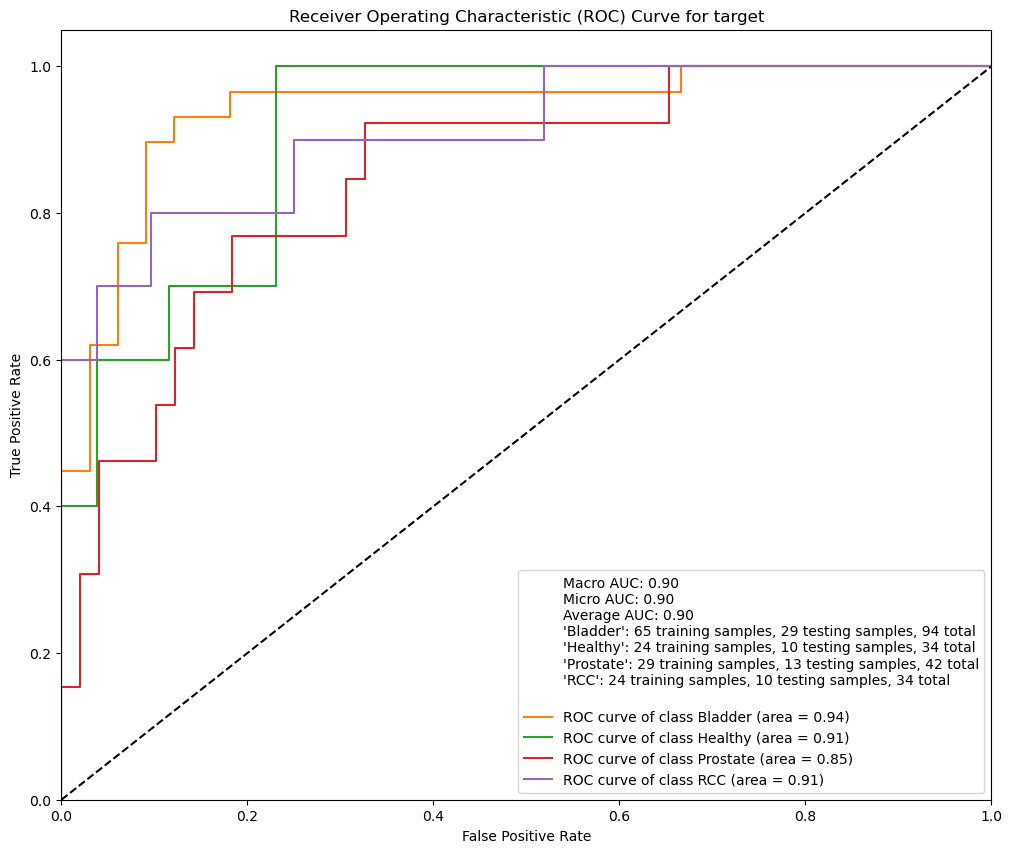

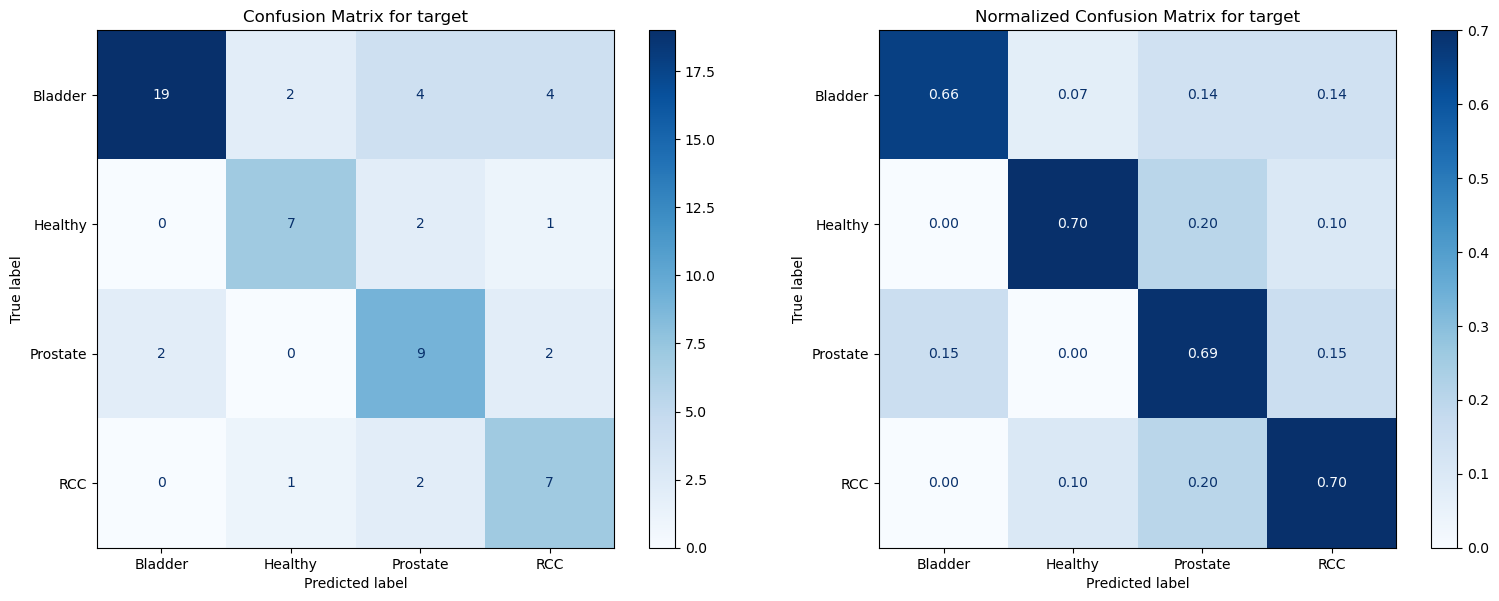

In [61]:

# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


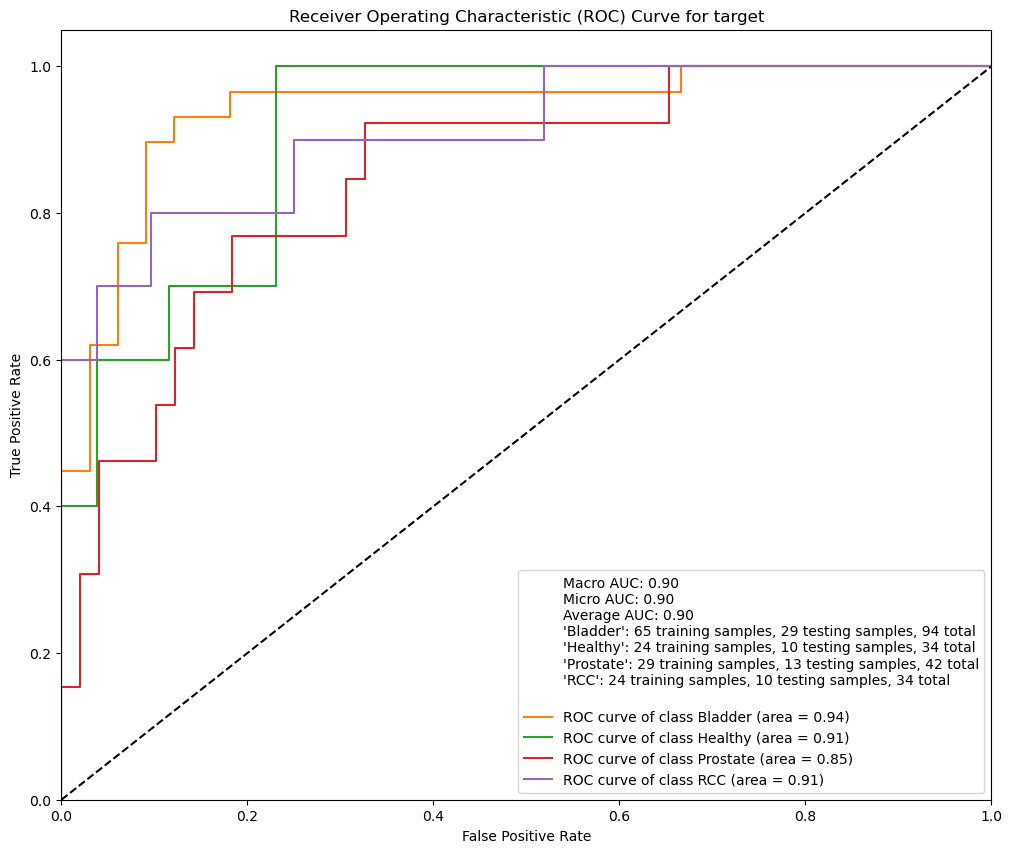

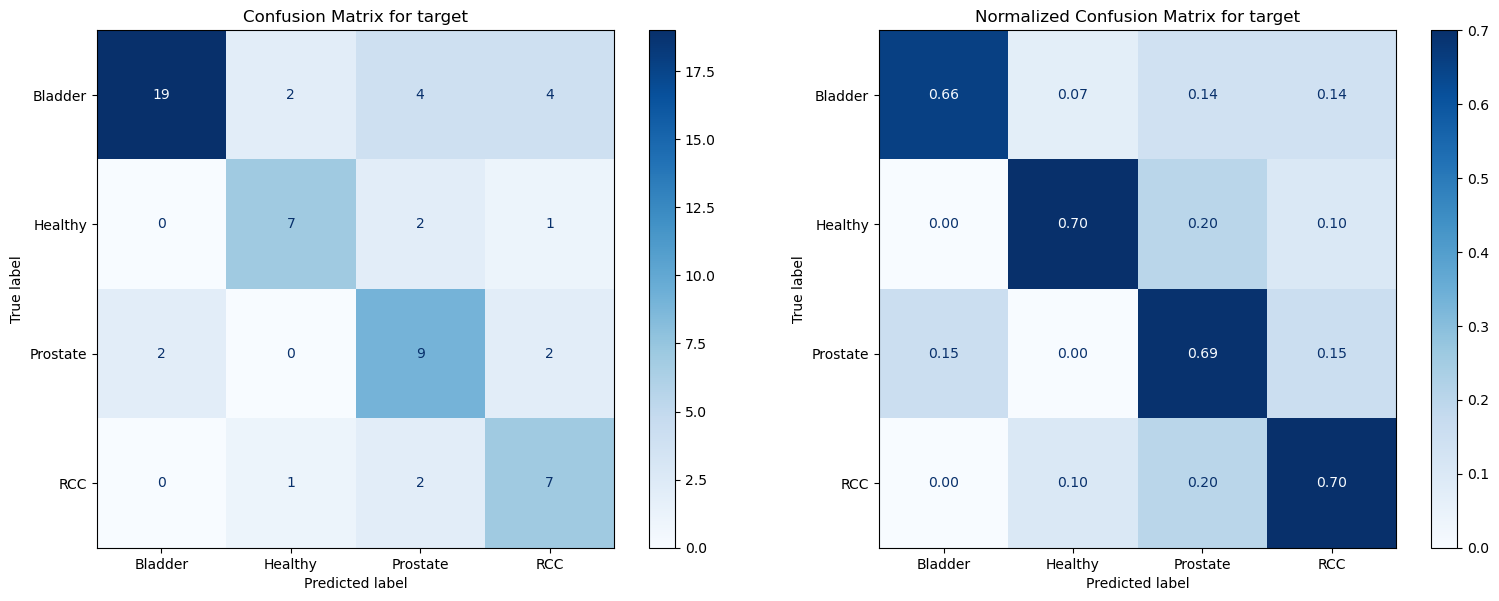

In [62]:
# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_macro',
        search_method='grid'
)

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


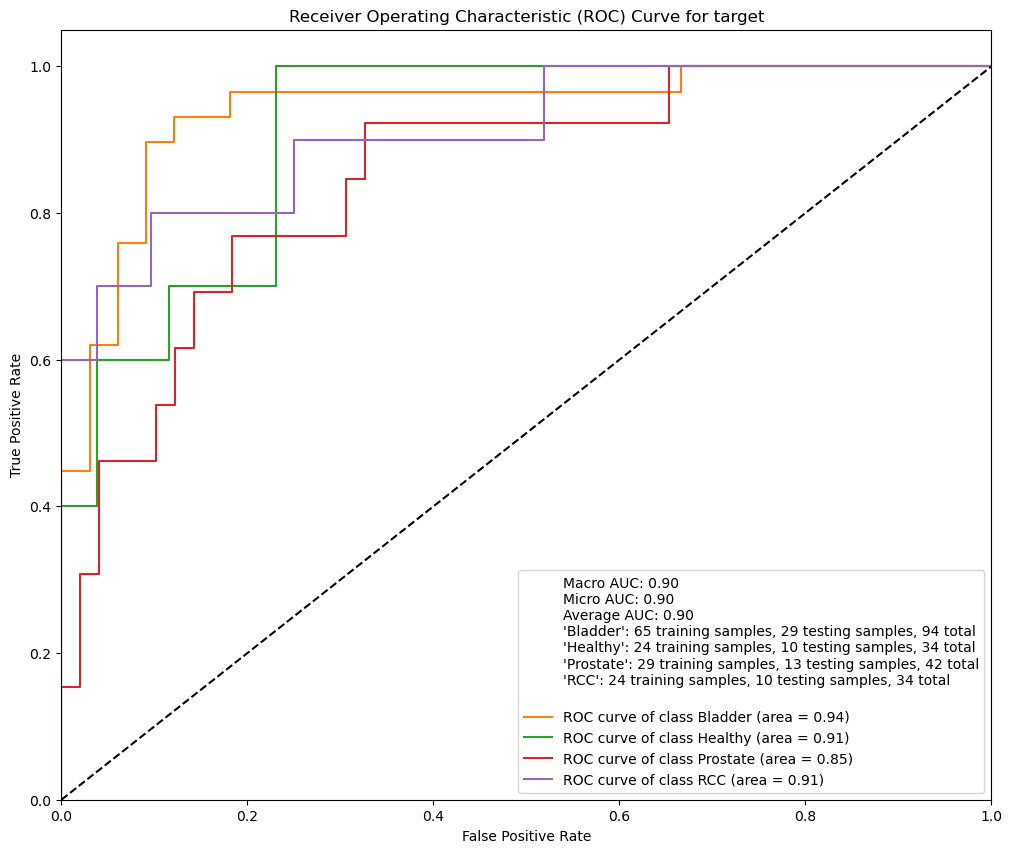

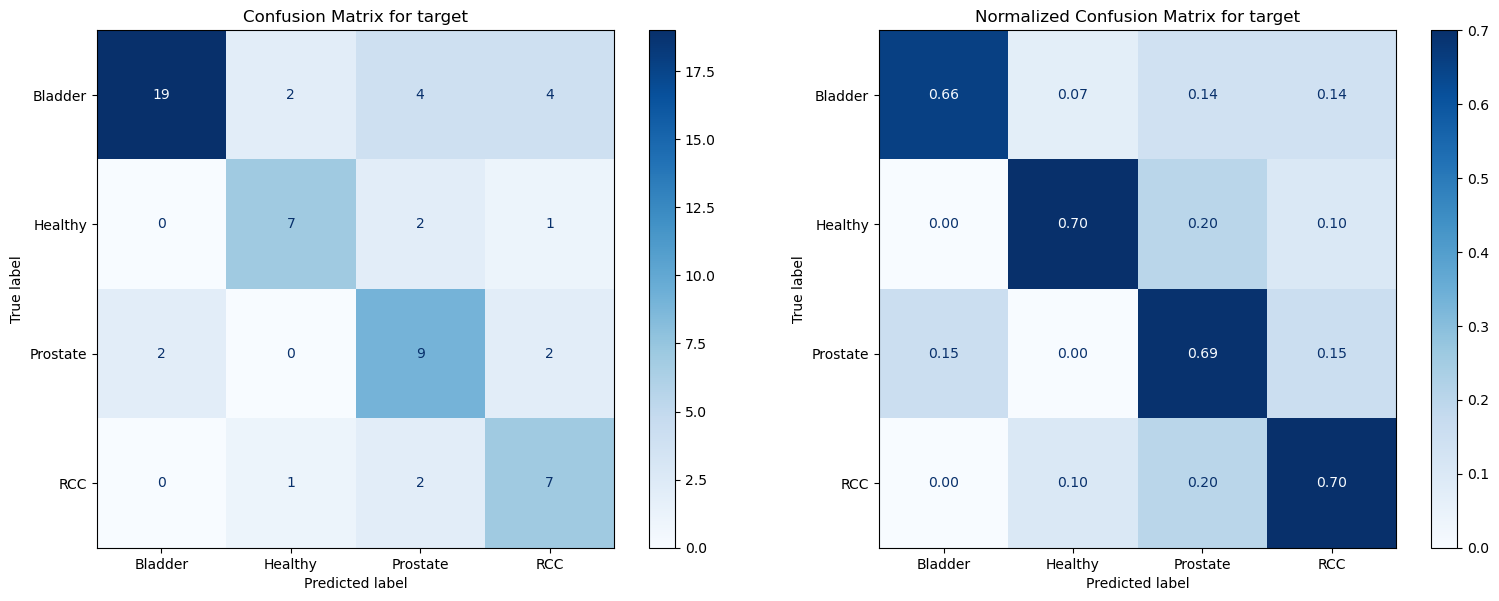

In [63]:


# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='balanced_accuracy',
        search_method='grid'
)

In [64]:
EndMotif_feature_importance.head()

,Feature,Importance
99,EndMotif_CGAT,0.011399
60,EndMotif_ATTA,0.010843
96,EndMotif_CGAA,0.010594
44,EndMotif_AGTA,0.009694
164,EndMotif_GGCA,0.008945


In [65]:
EndMotif_feature_importance.tail()

,Feature,Importance
176,EndMotif_GTAA,0.001727
234,EndMotif_TGGG,0.001699
151,EndMotif_GCCT,0.001608
226,EndMotif_TGAG,0.001448
238,EndMotif_TGTG,0.001373


In [66]:
#train_df, test_df
train_df.head()

,CNA_chr1_p,CNA_chr1_q,CNA_chr10_p,CNA_chr10_q,CNA_chr11_p,CNA_chr11_q,CNA_chr12_p,CNA_chr12_q,CNA_chr13_q,CNA_chr14_q,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB-239_UC1,0.117272,-0.221939,-0.070310,0.163572,0.157982,0.052835,0.039690,-0.090047,0.104980,0.275538,...,0.818285,1.341527,1.608676,1.510848,1.405388,0.374307,0.716436,1.035135,0.757938,Prostate
PB-313_UC1,0.794648,0.089060,0.068117,0.347522,0.294713,0.125144,-0.200687,-0.228360,-0.850086,0.303084,...,-0.455534,-1.470437,-1.444362,-0.826281,-0.550897,-0.943018,-1.374436,-1.601992,0.752047,Prostate
RCC013_UC2,-0.174759,-0.242226,-0.219963,0.163209,0.302970,0.092108,-0.005611,-0.205461,0.269528,0.097365,...,0.685017,0.439807,0.586962,0.477410,0.526591,0.230553,0.653336,0.556031,0.377698,RCC
PB-276_UC1,-0.195295,-0.384208,0.365251,1.165236,0.139979,0.100905,-0.104622,-0.347875,0.153107,0.010788,...,0.536169,-0.157774,-0.413797,-0.068879,0.084613,0.676034,0.223049,0.115052,-0.363400,Prostate
WBC1206_UC1,0.040960,-0.109850,-0.616490,-0.220045,0.383187,0.225369,-0.285871,-0.570340,0.397159,0.205319,...,2.392812,0.765110,0.241487,-0.150668,1.325919,1.374970,0.642669,0.481330,1.056431,Bladder


/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w